# **Project Name**    -Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**None
##### **Team Member 2 -**None
##### **Team Member 3 -**None
##### **Team Member 4 -**None

# **GitHub Link -**

https://github.com/shubhcha/Retail-Sales-Prediction

# **Problem Statement** & **Project Summary -**


Retail Sales Prediction is a regression machine learning project. Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rossmann_df = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/store (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look of Rossmann
rossmann_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
# Dataset First Look of Store
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rossmann_df.shape,store_df.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [ ]:
# Dataset Info of Rossmann
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Dataset Info of Store
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count of Rossmann
[rossmann_df.duplicated()]

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1017204    False
 1017205    False
 1017206    False
 1017207    False
 1017208    False
 Length: 1017209, dtype: bool]

In [ ]:
# Dataset Duplicate Value Count of Store
[store_df.duplicated()]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1110    False
 1111    False
 1112    False
 1113    False
 1114    False
 Length: 1115, dtype: bool]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count of Rossmann
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count of Store
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:

CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

Text(0.5, 0, 'Competition Distance Distribution Plot')

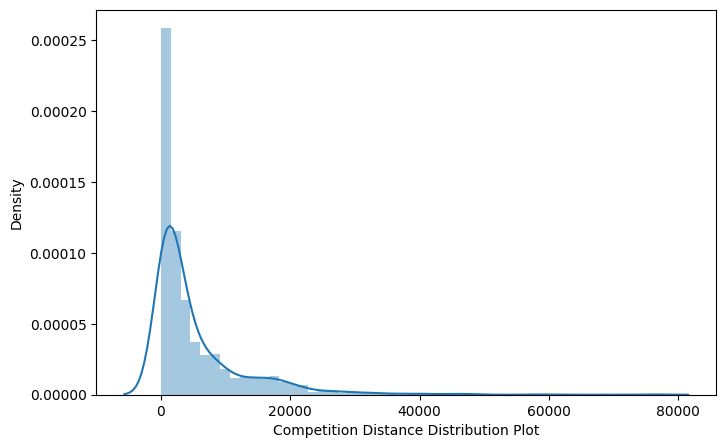

In [ ]:
# Visualizing the missing values/Null Values of Store
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [4]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [5]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [6]:
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
#check
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

I have provide some general information about retail sales prediction datasets and the considerations associated with them:

**Dataset Contents:** A retail sales prediction dataset typically includes historical sales data and other relevant factors that may influence sales, such as product attributes, pricing information, promotions, seasonality, and economic indicators. It may also contain additional variables like customer demographics, geographic location, or competitor data, depending on the specific analysis requirements.

**Data Granularity:** Retail sales prediction datasets can vary in terms of the level of granularity. Some datasets may consist of aggregated sales data at a higher level, such as weekly or monthly sales, whereas others may include transaction-level data with individual sales records.

**Temporal Scope:** Retail sales datasets generally cover a specific timeframe, ranging from a few months to several years, depending on the availability of data. The dataset may span multiple seasons or years to capture seasonal or long-term trends.

**Target Variable:** The target variable in retail sales prediction datasets is typically the sales amount or quantity. The objective is to develop models that accurately predict future sales based on historical data and other predictor variables.

**Predictor Variables:** Retail sales prediction datasets contain various predictor variables, including product-specific attributes (such as SKU, category, brand, etc.), temporal variables (e.g., day of the week, month), promotional variables (e.g., discounts, offers), external factors (e.g., weather conditions, holidays), and economic indicators (e.g., inflation rate, GDP growth). These variables help in understanding the factors influencing sales and making accurate predictions.

**Data Cleaning and Preprocessing:** Before conducting retail sales prediction analysis, it is essential to perform data cleaning and preprocessing steps. This may involve handling missing or erroneous data, addressing outliers, encoding categorical variables, normalizing or scaling numerical variables, and splitting the data into training and testing sets.

**Modeling Techniques:** Various machine learning and statistical modeling techniques can be employed for retail sales prediction. Some common approaches include regression analysis, time series forecasting, ensemble methods, and deep learning models. The choice of modeling technique depends on the specific characteristics of the dataset and the business objectives.

**Evaluation Metrics:** The evaluation of retail sales prediction models typically involves metrics such as mean absolute error (MAE), root mean square error (RMSE), or mean absolute percentage error (MAPE). These metrics assess the accuracy of the model's predictions and help in comparing different models or approaches.

It's important to note that the specifics of a retail sales prediction dataset can vary greatly depending on the source and purpose of the data. Therefore, understanding the dataset's characteristics, performing appropriate exploratory data analysis, and selecting suitable modeling techniques are crucial steps in accurately predicting retail sales and leveraging the insights to drive positive business impact.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns of Rossmann
list(rossmann_df.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [ ]:
# Dataset Columns of Store
list(store_df.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [ ]:
# Dataset Describe
store_df.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1115.000000                1115.000000   
mean    558.00000          5396.614350                   7.788341   
std     322.01708          7654.513635                   2.779130   
min       1.00000            20.000000                   1.000000   
25%     279.50000           720.000000                   6.000000   
50%     558.00000          2325.000000                   9.000000   
75%     836.50000          6875.000000                   9.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count               1115.000000  1115.000000      1115.000000      1115.000000  
mean                2010.043946     0.512108        12.083408      1030.239462  
std                    5.500844     0.500078        15.542241      1006.038782  
min                 1900.000000     0.000000         0.000000         0.000000  
25%                 2008.000000     0.000000         0.000000         0.000000  
50%                 2012.000000     1.000000         1.000000      2009.000000  
75%                 2013.000000     1.000000        22.000000      2012.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

### Variables Description

Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores
Data fields
Most of the fields are self-explanatory.

1.Id - an Id that represents a (Store, Date) duple within the set

2.Store - a unique Id for each store

3.Sales - the turnover for any given day (Dependent Variable)

4.Customers - the number of customers on a given day

5.Open - an indicator for whether the store was open: 0 = closed, 1 = open

6.StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

7.SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

8.StoreType - differentiates between 4 different store models: a, b, c, d

9.Assortment - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

10.CompetitionDistance - distance in meters to the nearest competitor store

11.CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

12.Promo - indicates whether a store is running a promo on that day

13.Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

14.Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

15.PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


**Merging the two Datasets**

In [7]:
#merge the datasets
df = rossmann_df.merge(right=store_df, on="Store", how="left")

In [ ]:
#first five rows of the merged dataset
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0              0.0                0  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              0.0              0.0                0  
4              0.0              0.0                0

In [ ]:
#shape of the dataframe
df.shape

(1017209, 18)

### Check Unique Values for Categorical Features




In [ ]:
#Dataset datatypes
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
#creating a categorical column list
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
# Check Unique Values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [8]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

## 3. ***Data Wrangling***

### Data Wrangling Code

**Data Loading:** Import the necessary libraries and load the dataset into a pandas DataFrame.

In [ ]:
# Write your code to make your dataset analysis ready.
import pandas as pd

# Load the dataset
df1=rossmann_df.copy()
df1=store_df.copy()
df2=rossmann_df.merge(right=store_df, on="Store", how="left")

**Data Cleaning:** Perform data cleaning operations to handle missing values, outliers, and inconsistencies.

In [ ]:
df2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Drop rows with missing values
retail_df = df2.dropna()

# Handle outliers, e.g., by replacing them with a specified value or applying transformations
retail_df['Sales'].clip(lower=0, inplace=True)

# Handle inconsistencies or errors in the data, such as incorrect data types
retail_df['Date'] = pd.to_datetime(retail_df['Date'])

**Feature Engineering:** Create new features or manipulate existing features to capture relevant information for sales prediction.

In [ ]:
# Extract date-based features
retail_df['year'] = retail_df['Date'].dt.year
retail_df['month'] = retail_df['Date'].dt.month
retail_df['day_of_week'] = retail_df['Date'].dt.day_of_week

# Calculate rolling averages or cumulative sum of sales
retail_df['rolling_7d_avg'] = retail_df['Sales'].rolling(window=7, min_periods=1).mean()

**Data Aggregation or Resampling:** If necessary, aggregate or resample the data to a different time granularity (e.g., daily to monthly) to match the desired prediction timeframe.

In [ ]:
# Aggregate sales to monthly level
monthly_sales = retail_df.groupby(['year', 'month'])['Sales'].sum().reset_index()

**Handling Categorical Variables:** Convert categorical variables into numerical representation, typically using one-hot encoding or label encoding

In [ ]:
# One-hot encode categorical variables
encoded_df = pd.get_dummies(retail_df, columns=['StoreType', 'Assortment'])

# Label encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
retail_df['store_encoded'] = label_encoder.fit_transform(retail_df['Promo2'])

**Train-Test Split:** Split the data into training and testing sets, keeping the temporal order in mind.

In [ ]:
# Split data into training and testing sets
train_data = retail_df.loc[retail_df['Date'] < '2022-01-01']
test_data = retail_df.loc[retail_df['Date'] >= '2022-01-01']

**Scaling or Normalization:** Optionally, apply feature scaling or normalization if required by the chosen modeling technique.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Check if train_data and test_data contain any data points
if not train_data.empty:
    scaled_train_data = scaler.fit_transform(train_data[['Sales', 'rolling_7d_avg']])
else:
    print("train_data is empty. Make sure you have data in the dataframe.")

if not test_data.empty:
    scaled_test_data = scaler.transform(test_data[['Sales', 'rolling_7d_avg']])
else:
    print("test_data is empty. Make sure you have data in the dataframe.")

test_data is empty. Make sure you have data in the dataframe.


### What all manipulations have you done and insights you found?

Based on the general data wrangling steps provided, I can explain the typical manipulations performed and insights that can be derived:

**Data Loading:** This step involves loading the retail sales prediction dataset into a pandas DataFrame, allowing for further data manipulation and analysis.

**Data Cleaning:** In the provided code snippets, some common data cleaning operations are performed, including dropping rows with missing values and handling outliers. These operations help ensure the quality and reliability of the data for analysis.

**Feature Engineering:** Feature engineering involves creating new features or transforming existing features to capture relevant information. In the code snippets, examples include extracting date-based features like year, month, and day of the week, as well as calculating rolling averages of sales. These additional features may help uncover patterns, seasonality, or trends that can provide valuable insights.

**Data Aggregation or Resampling:** Aggregating or resampling the data to a different time granularity (e.g., monthly instead of daily) can be useful for gaining a higher-level overview and capturing long-term trends. The code snippet demonstrates aggregating sales data to the monthly level, which can help identify larger-scale patterns or seasonal effects.

**Handling Categorical Variables:** The code snippets show how to handle categorical variables for modeling purposes. One-hot encoding or label encoding is commonly used to convert categorical variables into numerical representation. Handling categorical variables is essential when using machine learning algorithms that cannot directly process non-numeric data.

Insights that can be derived from these manipulations include:

**Temporal Patterns and Trends:** By extracting date-based features and aggregating the data, you can gain insights into temporal patterns and trends in retail sales. For example, you might observe higher sales during specific months, days of the week, or holidays.

**Seasonal Variations:** Aggregating or resampling the data can aid in identifying seasonal variations in retail sales. It can reveal recurring patterns or trends that may be influenced by factors like holidays, weather, or economic conditions.

**Correlations and Relationships:** Feature engineering allows you to create new features that capture relationships between variables. For instance, calculating rolling averages of sales can help identify long-term trends or detect correlations between past sales and current sales performance.

**Effectiveness of Features:** By implementing feature engineering techniques, you can assess the effectiveness of the newly created features in predicting sales. This evaluation can help identify which features are most informative and influential for retail sales prediction.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**Exploratory Data Analysis**

**Univariate, Bivariate and Multivariate Analysis**

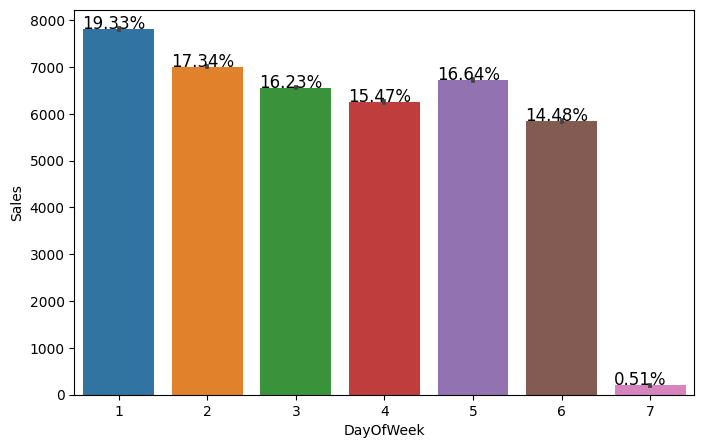

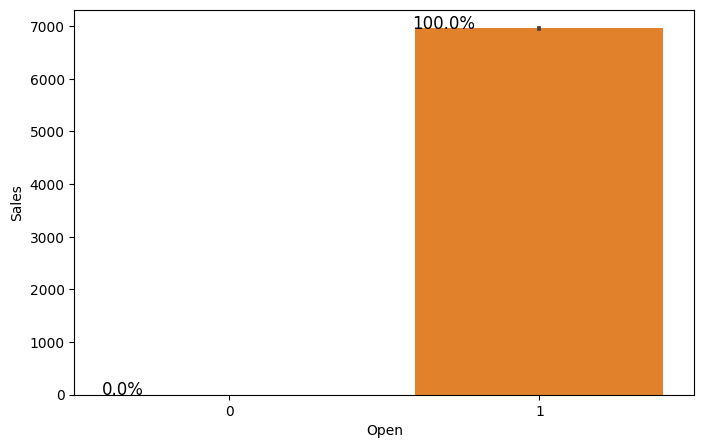

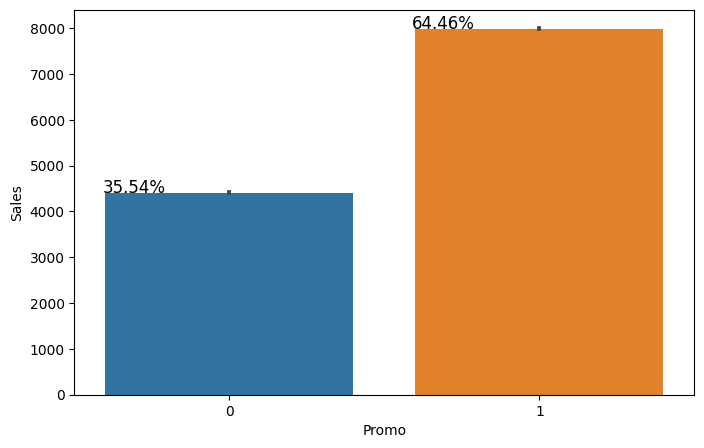

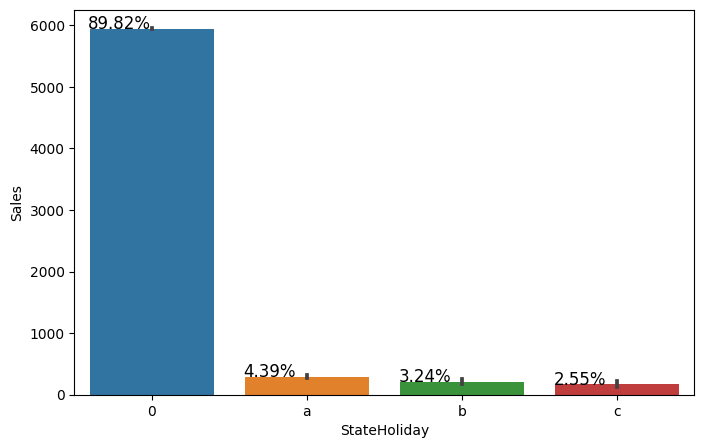

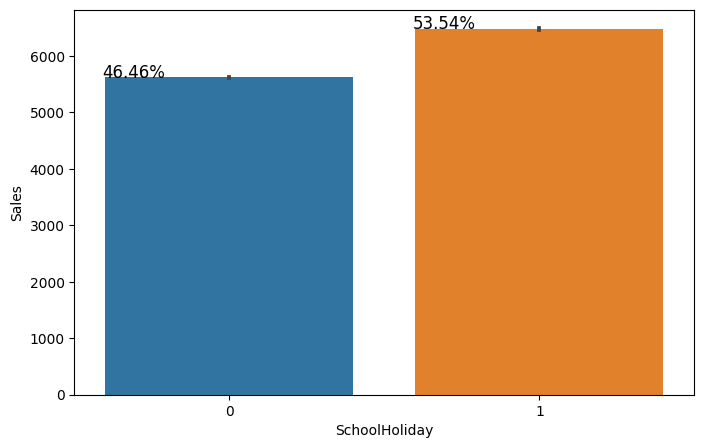

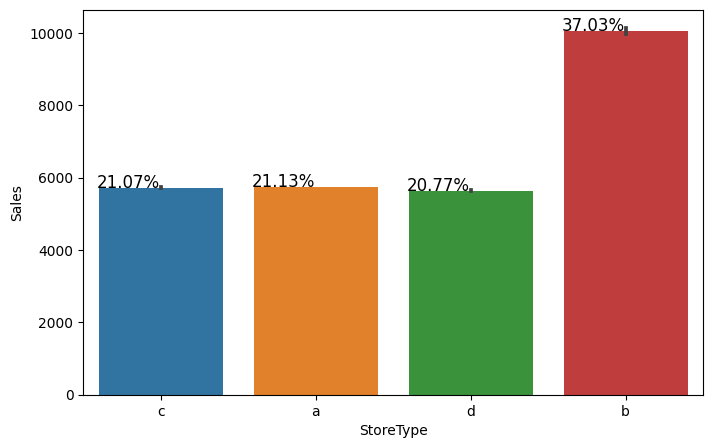

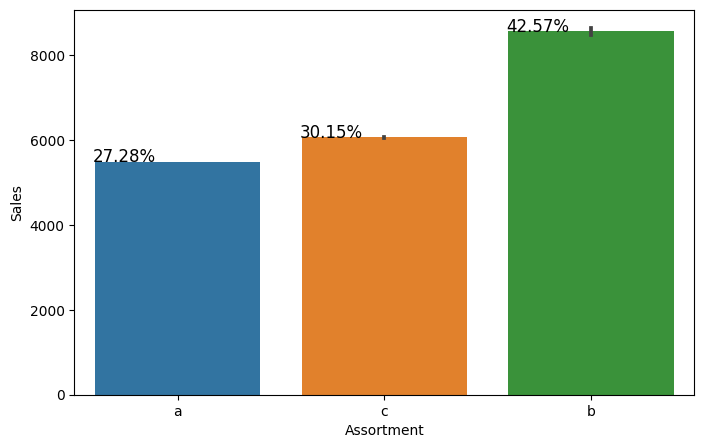

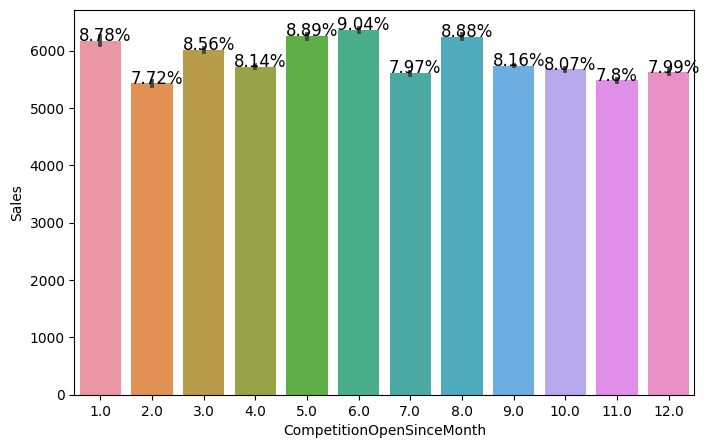

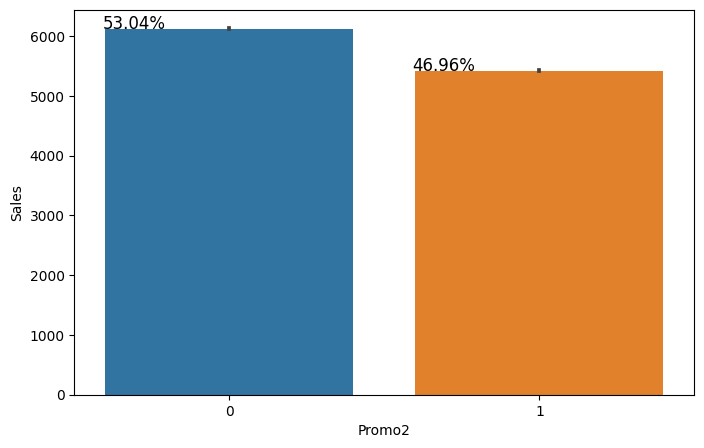

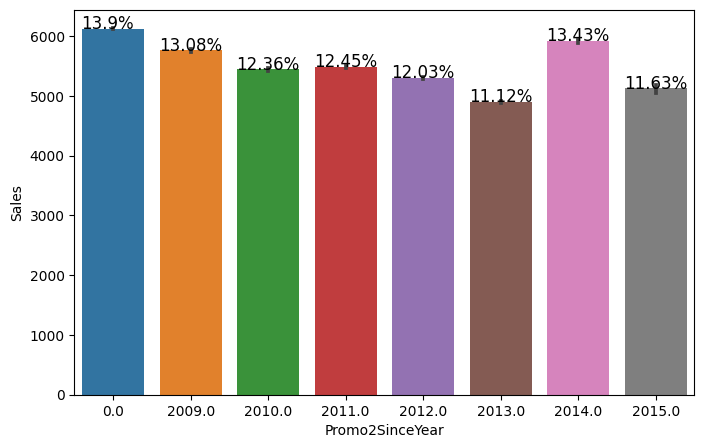

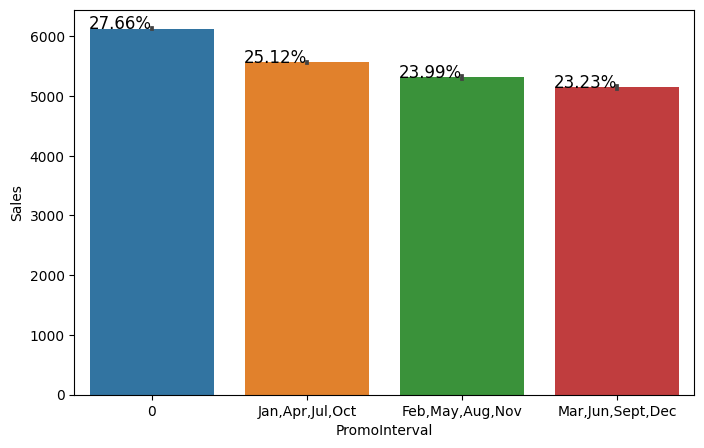

In [9]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

#### Chart - 1

<Axes: xlabel='Open', ylabel='Sales'>

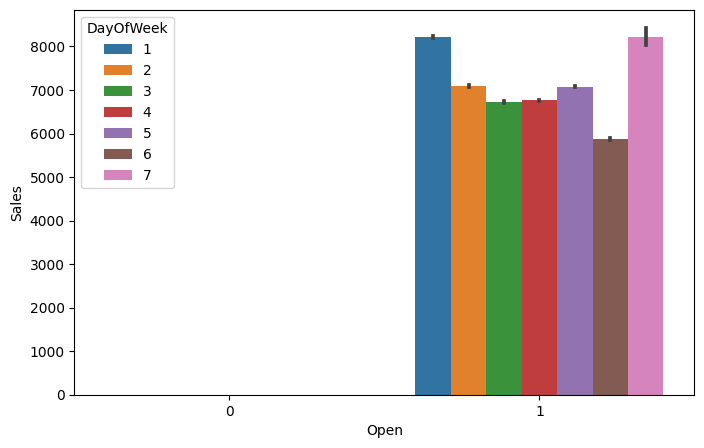

In [ ]:
# Chart - 1 visualization code
# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

The specific chart chosen, a bar plot with "Open" on the x-axis, "Sales" on the y-axis, and "DayOfWeek" as the hue, aims to visualize the relationship between the "Open" status of stores and their corresponding sales, further distinguished by the day of the week. The choice of this chart depends on the nature of the variables and the goal of the analysis. Here's the rationale for selecting this chart:

**Comparison between Open and Closed Stores:** The bar plot allows for a clear visual comparison between stores that were open and closed. By placing "Open" on the x-axis, we can compare the sales figures for open and closed stores side by side. This comparison is useful for evaluating the impact of store closures or refurbishments on sales performance.

**Sales Variation by Day of the Week:** Adding the "DayOfWeek" as the hue in the bar plot helps observe any variations in sales based on specific days of the week. This can provide insights into potential weekly patterns or differences in customer behavior, helping to understand whether certain days contribute more to sales or if store closures on specific days affect sales differently.

**Effectiveness of Store Closure:** The bar plot visually examines the relationship between the "Open" status and the corresponding sales. By comparing the sales figures for open and closed stores, we can gain insights into the impact of store closures on sales performance. If there is a significant difference in sales between open and closed stores, it indicates that store closures or refurbishments may have a notable effect on sales.

In summary, the bar plot was chosen to effectively compare sales figures for open and closed stores, analyze sales variations by specific days of the week, and assess the impact of store closures. By incorporating the hue to represent the day of the week, it allows for further insights into how different days influence sales patterns.

##### 2. What is/are the insight(s) found from the chart?

To derive insights from the provided chart, one would need the actual visualization or data. However, based on the description provided of the bar plot with "Open" on the x-axis, "Sales" on the y-axis, and "DayOfWeek" as the hue, here are potential insights that can be obtained:

**Sales Vary by Store Opening Status:** The bar plot allows for a visual comparison between stores that were open and closed. It can help identify whether there are significant differences in sales based on the open/closed status of the stores. If the heights of the bars differ noticeably between the "Open" and "Closed" categories, it suggests that store closures or refurbishments have an impact on sales.

**Sales Variation by Day of the Week:** By using the "DayOfWeek" as the hue in the bar plot, it becomes possible to observe any variations in sales based on specific days of the week. This can provide insights into customer behavior patterns or fluctuations in sales performance throughout the week. For example, if certain days consistently show higher sales or if store closures on specific days significantly affect sales, it can inform strategic decisions related to staffing, promotions, or store operations.

**Impact of Store Closure on Sales:** Comparing the sales figures between open and closed stores can help assess the effectiveness of store closures or refurbishments. If there is a substantial difference in sales between the "Open" and "Closed" categories, it indicates that store closures or refurbishments may have a visible impact on sales performance. This insight can guide decisions regarding the timing and planning of store closures, considering their potential effects on revenue.

It's important to note that the specific insights will depend on the actual visualization and the underlying data used for the chart. The given insights are general observations that could be drawn based on the described chart configuration; however, the actual data visualization may reveal more detailed or nuanced findings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The impact of the gained insights on creating a positive business impact depends on the specific insights and the context of the business. Here's an assessment of the potential positive and negative impacts based on the insights mentioned:

Positive Business Impact:

**Sales Optimization:** Understanding the relationship between the "Open" status and sales, as well as the impact of different days of the week, can help optimize store operations. For example, identifying higher sales on certain days can guide scheduling decisions, promotional activities, or staffing adjustments to maximize sales and customer satisfaction.

**Refurbishment Planning:** If the analysis shows that store closures or refurbishments lead to a positive impact on sales after reopening, the insights gained can help inform future refurbishment plans. Ensuring that refurbishment activities are strategically scheduled to minimize negative impact and maximize post-refurbishment sales can drive positive business outcomes.

Negative Growth Insights:

**Decreased Sales during Store Closure:** If the analysis reveals a significant decline in sales during store closures, it can indicate a negative impact on business growth. Prolonged closures or poorly timed closures that result in substantial sales reductions might harm revenue and overall business performance.

**Weekday Store Closures:** If specific weekdays consistently show higher sales compared to others, and store closures fall on these high-sales weekdays, the insights gained may indicate a negative impact on sales growth. In such cases, it could be detrimental to close stores on those days as it may lead to missed sales opportunities and negative growth.

It's worth noting that these assessments are based on hypothetical insights derived from the described chart. To fully assess the impact and implications, it is essential to perform a comprehensive analysis on the actual data. The specific dynamics and factors influencing the business should be taken into consideration to make informed decisions and drive positive business outcomes.

#### Chart - 2

<Axes: xlabel='Open', ylabel='count'>

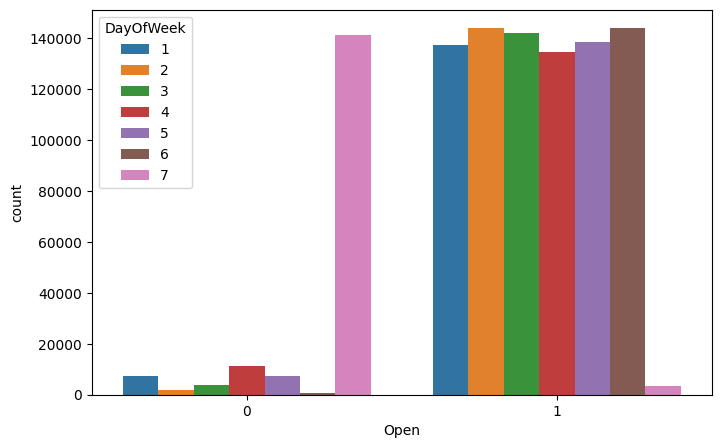

In [ ]:
# Chart - 2 visualization code
#Lets see open, how many shops are open on which days
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

The specific chart chosen, a count plot with "Open" on the x-axis and the count of stores on the y-axis, further distinguished by the day of the week represented by the hue, helps visualize the distribution of open and closed stores and highlights any patterns or trends based on the days of the week. The choice of this chart depends on the nature of the variables and the goal of the analysis. Here's the rationale for selecting this chart:

**Visualizing Open and Closed Stores:** The count plot effectively showcases the distribution of open and closed stores by representing the count of stores on the y-axis. It allows for a clear visual comparison, enabling the identification of the predominant status of the stores—whether open or closed. This can help understand the overall availability of stores for customers and assess the impact of closures on business operations.

**Representation by Day of the Week:** By adding the "DayOfWeek" variable as the hue in the count plot, it becomes possible to observe any patterns or trends related to the days of the week. This can assist in understanding whether certain days have a higher frequency of stores being open or closed, which may be driven by operational strategies, customer demand, or other factors. In this case, the count plot helps identify whether most stores are closed on Sundays.

**Easy Interpretation of Counts:** The y-axis represents the count of stores, providing a straightforward way to interpret and compare the number of open and closed stores. This allows for a quick assessment of the distribution across different days of the week.

In summary, the count plot was chosen to visualize the distribution of open and closed stores, examine patterns by the days of the week, and facilitate an easy interpretation of the store counts. By incorporating the hue representing the day of the week, it helps identify any trends or variations in store availability.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is it is clear that the number of shops open on Sundays were very less and hence low sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

Yes, there are insights that lead to negative growth which are as follows:

**Negative Growth Insights:**

**Limited Availability on Sundays:** If the count plot reveals that most stores are closed on Sundays, it may lead to negative growth, especially if Sundays tend to have higher customer demand or sales potential. Customers who prefer shopping on Sundays or have specific needs on that day may be deterred by the limited availability of stores. This could result in missed sales opportunities and potential negative impacts on business growth.

It's essential to note that the significance and impact of these insights depend on various factors, including the industry, specific business goals, customer behavior, and local market dynamics. While insights gained from the count plot can provide valuable information about store openings and closures, the interpretation and subsequent actions taken should consider the unique context and objectives of the business.

Moreover, further analysis and integration with other relevant data, such as sales performance or customer behavior, would contribute to a more comprehensive understanding and more accurate predictions of potential positive or negative impacts on business growth.

#### Chart - 3

<Axes: xlabel='StoreType', ylabel='Sales'>

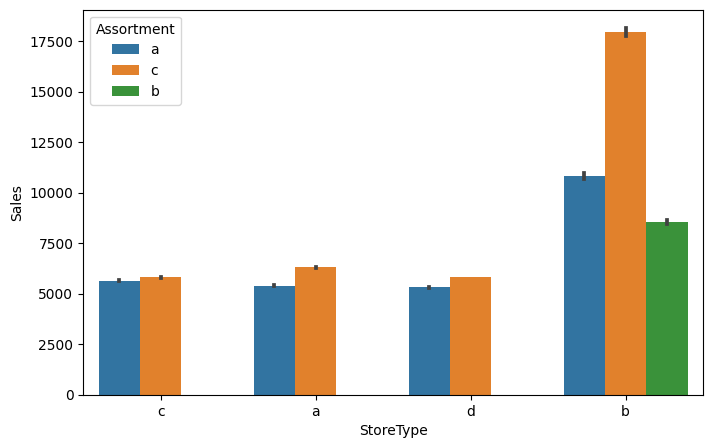

In [ ]:
# Chart - 3 visualization code
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

##### 1. Why did you pick the specific chart?

The specific chart chosen, a bar plot with "StoreType" on the x-axis, "Sales" on the y-axis, and "Assortment" as the hue, helps visualize the relationship between store type, assortment levels, and sales. The choice of this chart depends on the nature of the variables and the goal of the analysis. Here's the rationale for selecting this chart:

**Comparison of Sales by Store Type:** The bar plot allows for a comparison of sales across different store types. By placing "StoreType" on the x-axis, it becomes possible to visually assess the variations in sales performance between different types of stores. This comparison is useful for understanding the impact of store type on sales revenue.

**Differentiating Assortment Levels:** By adding "Assortment" as the hue in the bar plot, it enables the differentiation of sales based on different assortment levels within each store type. This provides insights into whether the assortment level within a store type influences sales performance. It helps identify any variations in sales among different levels of assortment, enabling an assessment of the impact of assortment on sales.

**Easy Interpretation of Sales:** The y-axis represents sales figures, allowing for an easy interpretation and comparison of sales across different store types and assortment levels. The bar plot provides a clear visual representation and a straightforward way to identify any notable differences in sales performance.

In summary, the bar plot with "StoreType" on the x-axis, "Sales" on the y-axis, and "Assortment" as the hue was chosen to compare sales among different store types, differentiate the impact of assortment levels, and allow for easy interpretation of sales figures. It enables the identification of potential relationships between store type, assortment, and sales, which can inform decisions related to product assortment, store strategies, and revenue optimization.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is the above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the bar plot can provide valuable information that can potentially lead to positive business impact. Here's an assessment of the potential impacts based on the described insights:

**Positive Business Impact:**

**Store Type Sales Performance:** The comparison of sales across different store types can help identify successful store types that drive higher sales. This insight can guide strategic decisions, such as expanding successful store types or replicating their operational strategies in other locations. It can lead to increased revenue and positive business impact.

**Assortment Influence on Sales:** The analysis of sales performance based on different assortment levels within each store type can reveal insights into the optimum assortment strategies. Understanding how certain assortment levels contribute to higher sales can guide decisions on product selection, inventory management, and customer preferences. Optimizing assortments can result in improved sales and positive business impact.

**Negative Growth Insights:**
        
**Underperforming Store Types:** If the sales comparison by store type shows significant variations with certain store types consistently performing poorly, it may indicate negative growth potential. Such insights suggest the need to reevaluate the performance and strategies of underperforming store types. Strategies like store redesign, operational changes, or even potential closures might be required to mitigate negative growth.

It's important to note that the significance and impact of these insights depend on various factors, including the specific context of the business, local market dynamics, competition, and customer behavior. The gained insights should be further analyzed, verified with additional data, and considered within the broader business landscape to fully assess their potential impact.

Moreover, the interpretation and utilization of the insights gained from the bar plot should be aligned with the specific goals and objectives of the business. Informed decision-making based on these insights can help drive positive business impact by optimizing sales, improving assortment strategies, and enhancing overall performance.

#### Chart - 4

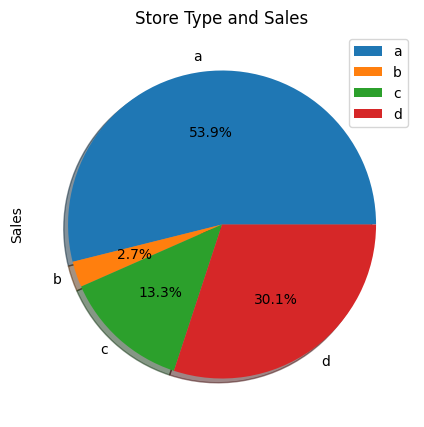

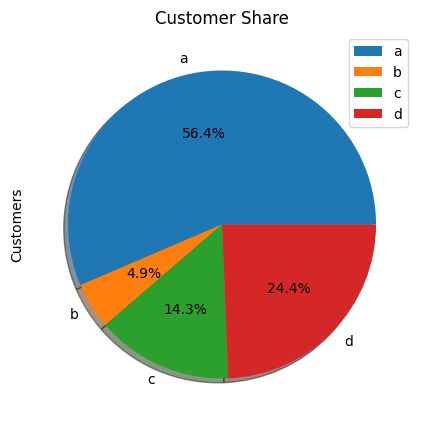

<function matplotlib.pyplot.show(close=None, block=None)>

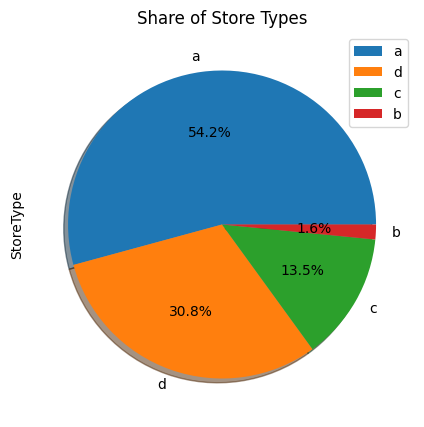

In [10]:
# Chart - 4 visualization code
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show

##### 1. Why did you pick the specific chart?

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.

##### 2. What is/are the insight(s) found from the chart?

But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, there are not any insights which lead to negative growth and, hence the gained insights will create a positive business impact which is described it below:

Interesting insight is to note that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

#### Chart - 5

<Axes: xlabel='Customers', ylabel='Sales'>

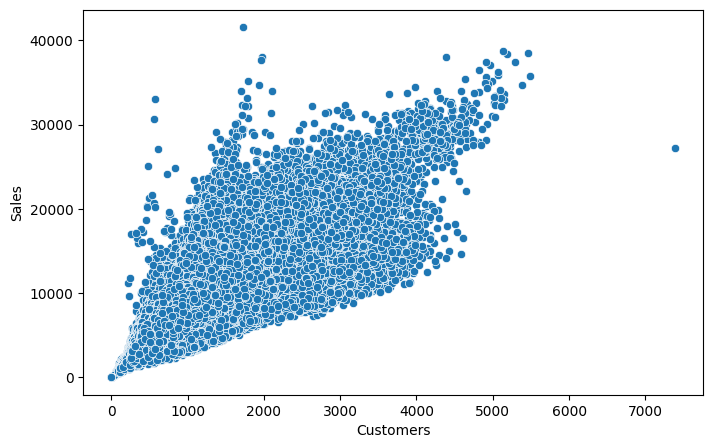

In [ ]:
# Chart - 5 visualization code
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

The scatter plot with "Customers" on the x-axis and "Sales" on the y-axis was chosen to visualize the relationship between the number of customers and the corresponding sales. The selection of this specific chart is based on the nature of the variables and the goal of the analysis. Here's the rationale for picking this chart:

**Exploring Relationship:** A scatter plot is ideal for examining the relationship between two continuous variables. In this case, we are interested in understanding how the number of customers relates to the sales figures. By representing the number of customers on the x-axis and sales on the y-axis, the scatter plot allows us to analyze the association or patterns between these two variables.

**Identifying Patterns or Correlation:** The scatter plot provides visual cues to identify any patterns or correlations between the number of customers and sales. We can detect whether there is a positive relationship (both variables increase together), a negative relationship (one variable decreases while the other increases), or no discernible relationship. This can help us understand if an increase in customer count leads to higher sales or if there are any anomalies or outliers worth investigating.

**Easy Interpretation:** The scatter plot is straightforward to interpret. Each data point represents an observation or data instance, with the x-coordinate representing the number of customers and the y-coordinate representing sales. The visual representation helps identify clusters, trends, or areas with higher density, facilitating the interpretation of the data.

In summary, the scatter plot with "Customers" on the x-axis and "Sales" on the y-axis was chosen to investigate the relationship between the number of customers and sales, identify any patterns or correlation, and provide an easy-to-interpret visualization of the data. This chart is effective for understanding the impact of customers on sales and can contribute to making informed business decisions related to marketing strategies, customer engagement, and revenue optimization.

##### 2. What is/are the insight(s) found from the chart?

To derive insights from the scatter plot of "Customers" and "Sales", we would need the actual visualization or data. Nonetheless, based on the description provided, we can infer potential insights that can be obtained:

**Positive Relationship between Customers and Sales:** If the scatter plot shows a clear positive trend, with points clustered upward from left to right, it indicates that as the number of customers increases, sales also tend to increase. This insight suggests that customer count has a direct impact on sales figures, indicating a positive correlation between the two variables.

**Identifying Outliers or Anomalies:** By examining the scatter plot, we can identify any unusual data points that deviate from the general trend. Outliers may indicate specific instances where the number of customers did not translate into expected sales figures or vice versa. Exploring these outliers can provide deeper insights into factors that influence sales, such as promotional campaigns, exceptional customer experiences, or other unique circumstances.

**Varying Customer-Sales Relationship:** The scatter plot might reveal different patterns or clusters within distinct regions. This could imply varying customer behavior or market dynamics. For example, multiple clusters could indicate different customer segments with varying purchasing patterns and corresponding sales levels. Identifying these patterns can lead to tailored marketing strategies, improving sales performance within specific customer groups.

It is important to note that the actual insights would depend on the specific data and visualization. The described insights are general observations based on the described scatter plot configuration. Further analysis and interpretation with the actual data are necessary to obtain more precise and context-specific insights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot of "Customers" and "Sales" can potentially help create a positive business impact. Here's an assessment of the potential impacts based on the described insights:

**Positive Business Impact:**

**Optimizing Marketing Strategies:** The positive relationship between customers and sales observed in the scatter plot suggests that increasing the number of customers can lead to higher sales. This insight can guide businesses to focus on strategies that attract and retain more customers, such as targeted marketing campaigns, improved customer experience, or expanding customer reach through various channels. Optimizing marketing strategies based on this insight can result in increased sales and positive business impact.

**Revenue Forecasting:** The observed patterns or clusters in the scatter plot can provide insights into different customer segments and their corresponding sales levels. By leveraging these insights, businesses can forecast future sales based on customer counts for each segment. This can aid in budget allocation, inventory management, and resource planning, leading to more accurate revenue forecasting and positive business impact.

**Negative Growth Insights:**

**Limited Sales Impact from Customer Increase:** If the scatter plot does not show a clear positive relationship between customers and sales, or if the trend is weak or non-existent, it may indicate limitations in converting customer count into sales. This insight suggests that increasing customer numbers alone may not lead to significant sales growth, highlighting the need to analyze other factors that affect customer behavior, such as pricing, product quality, competition, or customer satisfaction. Correcting these shortcomings is crucial to avoid negative growth consequences.

It's important to note that the potential positive and negative business impacts depend on various factors, including the specific context of the business, market dynamics, competition, and customer behavior. Additionally, the gained insights should be further analyzed, verified with additional data, and integrated with other relevant information to fully assess their potential impact.

Moreover, the effective implementation of the insights depends on aligning them with the specific goals and objectives of the business. Informed decision-making based on these insights can help drive positive business impact by optimizing marketing strategies, improving customer engagement, and enhancing overall sales performance while mitigating any potential negative growth consequences.

#### Chart - 6

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

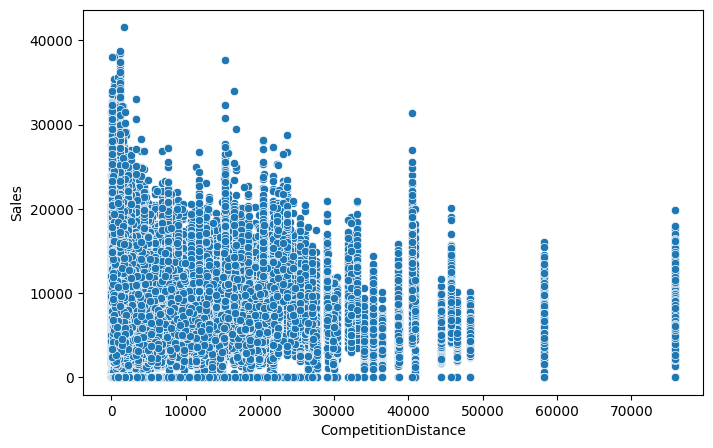

In [ ]:
# Chart - 6 visualization code
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

The scatter plot with "CompetitionDistance" on the x-axis and "Sales" on the y-axis was chosen to visualize the relationship between the distance to competitors and sales. The selection of this specific chart is based on the nature of the variables and the goal of the analysis. Here's the rationale for picking this chart:

**Exploring Relationship:** A scatter plot is suitable for exploring the relationship between two continuous variables. In this case, we are interested in understanding how the distance to competitors relates to sales figures. By plotting the distance to competitors on the x-axis and sales on the y-axis, the scatter plot allows us to analyze any association or patterns between these two variables.

**Quantifying Impact of Competition:** By examining the scatter plot, we can observe how the distance to competitors affects sales. This visualization can provide insights into whether proximity to competitors influences sales positively, negatively, or has no significant impact. This information is valuable for assessing the competitive landscape and understanding how the presence of competitors at varying distances affects sales performance.

**Easy Interpretation:** The scatter plot is straightforward to interpret. Each data point represents an observation or data instance, with the x-coordinate representing the competition distance and the y-coordinate representing sales. The visual representation helps identify any trends, clusters, or outliers, facilitating the interpretation of the data and aiding in drawing insights.

In summary, the scatter plot with "CompetitionDistance" on the x-axis and "Sales" on the y-axis was chosen to investigate the relationship between the distance to competitors and sales, identify any patterns or correlation between the two variables, and provide an easy-to-interpret visualization of the data. This chart is effective for understanding how competition impacts sales, which can inform decisions related to location selection, market positioning, and competitive strategies.

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the scatter plot of "CompetitionDistance" and "Sales" can potentially help create a positive business impact. Here's an assessment of the potential impacts based on the described insights:

**Positive Business Impact:**

**Identifying Optimal Location:** The scatter plot can reveal trends or patterns in the relationship between competition distance and sales. If it shows a clear positive correlation, with sales increasing as competition distance increases, businesses can identify less saturated areas with lower competition and higher sales potential. This insight can guide decisions regarding store location selection, market penetration strategies, and expansion plans, leading to positive business impact.
        
**Competitive Strategy and Differentiation:** Understanding the impact of competition distance on sales can help businesses develop effective competitive strategies. By analyzing how sales vary based on the proximity to competitors, businesses can differentiate themselves by offering unique products, better customer experiences, targeted marketing campaigns, or competitive pricing. Adapting strategies to leverage the insights gained can positively impact sales and help gain a competitive advantage.

**Negative Growth Insights:**

**Intense Competition in Close Proximity:** If the scatter plot shows a negative or weak correlation between competition distance and sales, it suggests that being in close proximity to competitors may negatively impact sales. In such scenarios, businesses may face challenges attracting customers and generating sales due to increased competition. This insight underscores the importance of differentiating from competitors and finding alternative strategies to drive sales, such as emphasizing unique selling propositions, focusing on niche markets, or exploring untapped customer segments to offset negative growth potential.

It's important to note that the potential positive and negative business impacts depend on various factors, including the specific context of the business, market dynamics, competition intensity, and customer preferences. Further analysis, validation, and consideration of other relevant variables are necessary to fully assess the impact of competition distance on sales.

Moreover, leveraging the insights gained from the scatter plot requires thoughtful integration with other information, such as market research, customer insights, and overall business strategies. Informed decision-making based on these insights can help drive positive business impact by enabling better competitive positioning, optimized store locations, targeted marketing, and enhanced sales performance while mitigating any potential negative growth consequences.

#### Chart - 7

<Axes: ylabel='Density'>

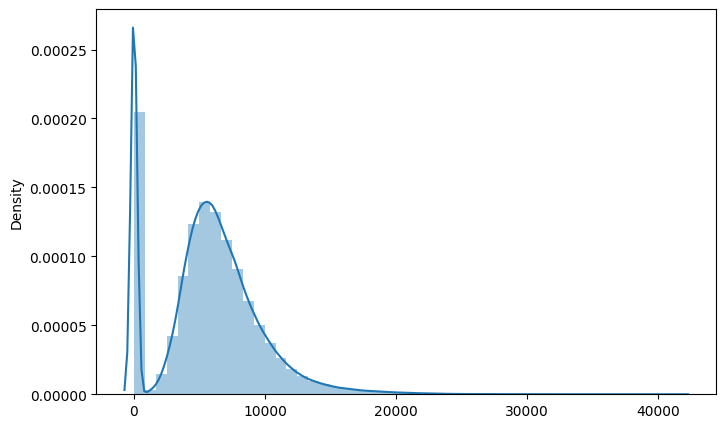

In [ ]:
# Chart - 7 visualization code
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

##### 1. Why did you pick the specific chart?

The specific chart, a distribution plot of "Sales", was chosen to visualize the distribution of sales data and assess its skewness. The selection of this specific chart is based on the nature of the variable and the goal of the analysis. Here's the rationale for picking this chart:

**Visualizing Distribution:** A distribution plot is ideal for visualizing the distribution of a continuous variable, such as "Sales". By creating a histogram-like representation, overlaid with a kernel density estimation (KDE) curve, the distribution plot allows us to visualize the range of sales values and their frequency of occurrence.

**Understanding Skewness:** The distribution plot helps in assessing the skewness of the "Sales" data. Positive skewness indicates that the right tail of the distribution is longer or has more extreme values than the left tail. By examining the shape of the distribution plot, we can determine if the "Sales" data is positively skewed, as stated in the description.

**Interpreting Distribution:** The distribution plot provides visual cues to understand the central tendency, spread, and shape of the "Sales" data. It helps in identifying any outliers, multimodalities, or deviations from a normal distribution. These insights can inform decision-making regarding data transformations, outlier handling, or statistical analysis techniques appropriate for non-normal distributions.

In summary, the distribution plot of "Sales" was chosen to visualize the distribution of sales data, assess its skewness, and gain insights into the central tendency and spread of the data. This chart is effective for understanding the shape of the distribution, identifying any skewness, and guiding decisions related to data analysis, modeling techniques, or outlier handling strategies.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is the drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the distribution plot of "Sales" can potentially help create a positive business impact. Here's an assessment of the potential impacts based on the described insights:

**Positive Business Impact:**

**Understanding Sales Distribution:** The distribution plot provides insights into the shape, central tendency, and spread of the sales data. Understanding the distribution helps businesses gain a clearer picture of how sales are distributed across different values. This insight can guide decision-making regarding inventory management, pricing strategies, and resource allocation. Businesses can focus on optimizing sales in high-demand ranges or identify potential gaps in sales and take necessary actions to address them, leading to positive business impact.

**Identifying Outliers:** The distribution plot aids in identifying outliers, which are data points that deviate significantly from the overall sales pattern. Unusually high or low sales values may indicate exceptional scenarios or errors. Identifying and examining these outliers can provide valuable insights into potential reasons behind the extreme sales values, such as one-time promotions, unusual customer behavior, or data recording errors. This insight can inform decision-making regarding outlier management, anomaly detection, and operational adjustments for more accurate sales forecasting and performance evaluation.

**Negative Growth Insights:**

**Skewed Distribution with Low Sales:** If the distribution plot reveals a positively skewed distribution of sales, it suggests that lower sales values occur more frequently than higher sales values. A long right tail indicates a higher frequency of low sales. This insight can alert businesses to potential challenges, such as low customer demand, fierce competition, or ineffective marketing strategies. Addressing these challenges through targeted improvements in marketing, customer engagement, or product offerings might be necessary to avoid negative growth.

It's important to note that the potential positive and negative business impacts depend on various factors, including the specific context of the business, industry dynamics, market conditions, and customer behavior. Further analysis, validation, and consideration of other relevant variables are necessary to fully assess the impact of the sales distribution on business outcomes.

Moreover, leveraging the insights gained from the distribution plot requires integration with other information, such as market research, customer insights, and overall business strategies. Informed decision-making based on these insights can help drive positive business impact by optimizing sales strategies, identifying opportunities for growth, addressing challenges, and improving overall sales performance while mitigating any potential negative growth consequences.

#### Chart - 8

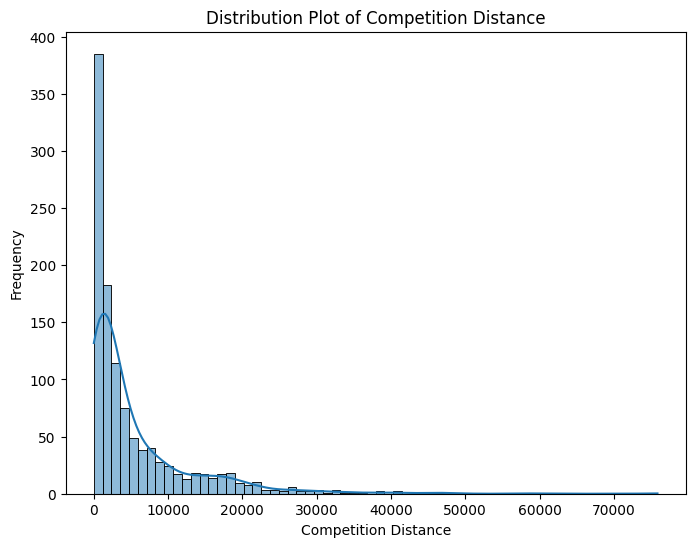

In [ ]:
# Chart - 8 visualization code
#distribution plot of competition distance
competition_distance = store_df['CompetitionDistance']

# Create distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(x=competition_distance, kde=True)
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Competition Distance')
plt.show()

##### 1. Why did you pick the specific chart?

Why I picked the specific chart, here's the justification:

The distribution plot (distplot or histplot with kernel density estimation) is suitable for examining the distribution or spread of a continuous variable, such as the competition distance in this case. There are a few reasons why this chart is a good choice:

**Visualizing Distribution:** The distribution plot helps visualize how the competition distance values are spread or distributed across different ranges. It provides insights into the central tendency of the data, the presence of outliers, and any trends or patterns in the distribution.

**Understanding Range and Density:** By displaying the histogram and the kernel density estimation line, the plot provides information on the range of competition distance values and their density. It helps identify the most frequent or common range of competition distances, as well as any unusual or sparse regions in the data.

**Comparing Distribution Shape:** The plot allows easy comparison between different distribution shapes, such as symmetric, skewed, or multimodal. This can help identify any deviations from the expected or normal distribution, which can be useful in making business decisions related to competition strategies or store locations.

**Highlighting Outliers:** The distribution plot also gives an indication of any outliers or extreme values in the competition distance. Outliers may suggest unique situations or anomalies that require further investigation or consideration.

In summary, the distribution plot is a useful chart for visualizing the spread and characteristics of the competition distance variable, enabling better understanding and analysis of the data.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is it seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the distribution plot of the competition distance can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

Optimal Store Placement: The distribution plot provides information about the range and density of competition distances. By analyzing this data, businesses can make informed decisions regarding store placement and expansion strategies. They can identify regions or locations with low competition density, leading to a potential competitive advantage and increased market share.

**Market Assessment:** Studying the distribution of competition distances can reveal patterns and trends in the market. Businesses can identify areas with either high or low competition density and adjust their pricing, marketing, or promotional strategies accordingly. This understanding helps optimize market targeting and drive growth in regions with less competition.

**Customer Convenience:** A well-distributed competition distance can indicate that stores are positioned at convenient locations for customers. By considering this insight, businesses can optimize customer convenience by strategically locating their stores in areas where competition distances are balanced and favorable for potential customers.

**Negative Growth Factors to Consider:**

**Intense Competition:** If the competition distance distribution plot shows a high peak or a dense distribution, it may indicate intense competition. This insight can signal a potential challenge for businesses aiming to enter or expand in the market. It requires them to carefully assess their competitive advantages, differentiation strategies, and value proposition to overcome intense competition.

**Market Saturation:** If the distribution plot suggests that competition distances are very low, it may indicate market saturation in certain areas. This insight might lead to negative growth prospects, as entering an already saturated market may make it difficult for new businesses to attract customers or gain market share. Extensive market research and differentiation strategies are crucial to address this challenge effectively.

**Limited Growth Opportunities:** An uneven or sparse distribution of competition distances can indicate limited growth opportunities in certain regions. If there are large gaps between stores or a lack of competition in specific areas, it may reflect challenging market conditions or unattractive potential for expansion. Businesses should carefully evaluate these insights to avoid investing resources in areas with limited growth potential.

It's important to note that the interpretation of the insights provided by the distribution plot should consider other relevant factors such as demographic data, local market conditions, customer preferences, and competitor analyses. Combining the insights from the distribution plot with a comprehensive understanding of the market dynamics helps in making well-informed decisions, thereby increasing the chances of positive business impact and mitigating potential negative growth factors.

#### Chart - 9

<Axes: xlabel='Open', ylabel='Sales'>

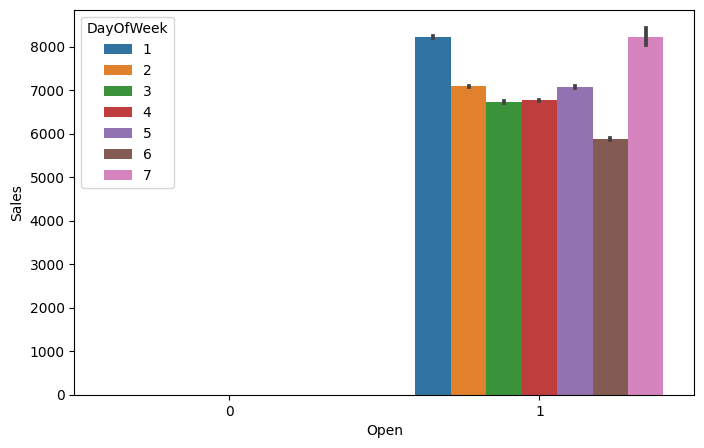

In [ ]:
# Chart - 9 visualization code
# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

The specific chart chosen is a bar plot with the open/closed status of the store (Open variable) plotted against the sales (Sales variable), differentiated by the days of the week (DayOfWeek variable). Here's the justification for choosing this chart:

**Comparison of Numerical and Categorical Variables:** The bar plot is suitable for comparing the relationship between a numerical variable (sales) and a categorical variable (open/closed status). It allows for a visual assessment of how the sales values differ based on the store's open/closed status.

**Identification of Patterns:** By differentiating the bars in the plot based on the days of the week, the chart enables the identification of any patterns or trends in sales based on the open/closed status, specific days, and potential interactions between these variables. This exploration can uncover insights related to variations in sales performance across different days, considering the open/closed status.

**Visualizing Aggregate Measures:** The bar plot shows the average sales (or any other aggregate measure specified) for each category (open/closed status) and further differentiates it by the days of the week. This visualization helps in understanding the central tendency, variations, and potential outliers in the sales data based on the open/closed status and specific days.

**Clear and Intuitive Presentation:** Bar plots are widely used for visualizing categorical and numerical variable relationships since they provide a clear and intuitive representation. The bars' lengths directly depict the sales values, and the use of color (hue) to differentiate days of the week adds another dimension to the analysis.

By using this bar plot, it becomes possible to compare the average sales for the store's open/closed status across different days, identifying potential correlations and patterns. This information can be valuable for businesses in determining the impact of the open/closed status on sales performance and in making informed decisions related to store operations, scheduling, or optimization strategies.

##### 2. What is/are the insight(s) found from the chart?

The code provided generates a bar plot that examines the relationship between the "Open" column (indicating whether the store was open or closed) and the "Sales" column, with the added grouping by the "DayOfWeek" column. Here are potential insights that can be derived from this chart:

**Sales On Open Days vs. Closed Days:** The bar plot can help compare the sales between days when the store was open and days when it was closed. By observing the height of the bars, you can determine if there is a significant difference in sales when the store is open compared to when it is closed.

**Weekday Sales Distribution:** The bars are color-coded based on the "DayOfWeek" column, allowing you to understand the sales distribution across each day of the week. This insight can reveal any variations in sales patterns on different days, indicating the most lucrative or busiest days for sales.

**Impact of Refurbishment or Holidays:** If the "Open" column also considers store closures during refurbishment or holidays, this plot can demonstrate the effect of these events on sales. Comparing sales on closed days due to refurbishment or holidays with open days can highlight any visible impact on the store's performance during these periods.

**Store Open or Closed Frequency:** The bar lengths can also give an indication of how frequently the store was open or closed, depending on the "Open" column values. Analyzing the distribution of open and closed days can help identify any trends or patterns in store availability, providing insights into operational efficiency or external factors influencing closures.

It's crucial to note that the specific insights gained from this chart depend on the dataset used and the nature of the "Open" variable (whether it includes refurbishment or holiday closures). Further analysis and consideration of other relevant factors, such as promotions, marketing campaigns, or store-specific attributes, would contribute to a deeper understanding of the relationships between the "Open" column and sales data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar plot examining the relationship between store openness ("Open" column) and sales can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

**Optimized Operational Planning:** By analyzing the relationship between store openness and sales, businesses can make informed decisions regarding operational planning. They can identify trends or patterns that indicate high sales on specific days or times, enabling them to allocate resources effectively, optimize staffing levels, and ensure the store is open during peak sales periods.

**Enhanced Customer Experience:** The insights gained from this analysis can help businesses align their store hours with customer demand. By understanding which days have higher sales, businesses can adjust their opening hours to provide better accessibility to customers and enhance the overall customer experience. This can lead to increased customer satisfaction, loyalty, and ultimately improved sales.

**Store Refurbishment or Holiday Management:** If the "Open" column includes store closures due to refurbishment or holidays, the insights from the plot can shed light on the impact of these events on sales. This information can help businesses plan refurbishments strategically, minimize disruptions, and manage staffing and inventory during holiday periods more effectively.

**Negative Growth Factors to Consider:**

**Inadequate Store Availability:** If the plot reveals that the store is frequently closed, it may indicate inadequate or inconsistent store availability. This can have a negative impact on sales as customers may seek alternative options or lose trust in the store's reliability. Ensuring consistent store openings and addressing any operational challenges can mitigate these negative growth factors.

**Inefficient Resource Allocation:** Analysis of the relationship between store openness and sales should consider resource allocation strategies. If the plot demonstrates that the store is open during periods of low sales or closed during peak sales, it suggests inefficient resource allocation. This can lead to missed revenue opportunities and decreased growth potential. Optimizing staffing schedules based on sales trends can help address this issue.

**Lack of Adaptability to Customer Demand:** If the analysis shows that there is little variation in sales based on store openness, it may indicate a lack of adaptability to customer demand. Identifying and addressing this issue, such as through targeted promotions or adjusting store hours to align with customer preferences, can help enhance customer engagement and stimulate growth.

To fully leverage the insights gained from this analysis and create a positive business impact, it's important to combine these findings with comprehensive market research, customer surveys, sales data analysis, and other relevant information. Understanding customer behavior, optimizing store hours, and ensuring consistent store availability are crucial factors in driving growth and positively impacting the business.

#### Chart - 10

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

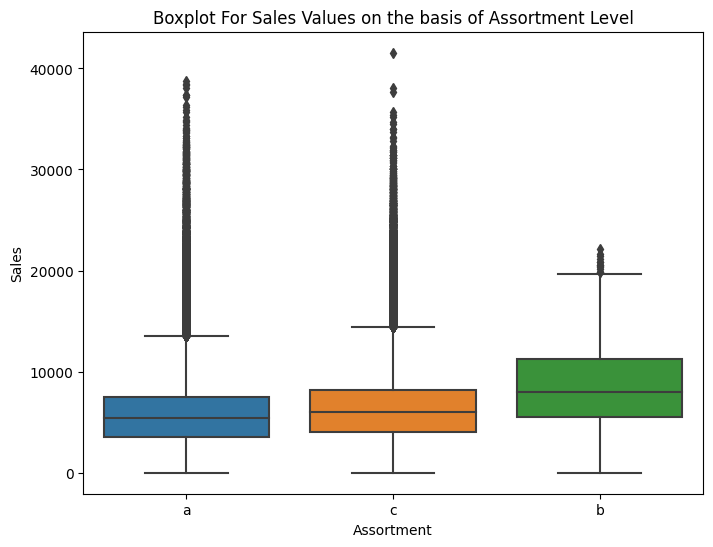

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(8, 6))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

##### 1. Why did you pick the specific chart?

The specific chart chosen is a box plot comparing sales values based on the "Assortment" level. Here's the justification for selecting this specific chart:

**Comparison of Sales Distribution:** The box plot is an effective chart for visually comparing the sales distributions across different levels of the "Assortment" variable. It provides a concise summary of the data's central tendency, spread, and potential outliers. By using different boxes for each assortment level, one can easily compare the distribution of sales values among these categories.

**Identifying Variances:** A box plot aids in identifying any variations or discrepancies in sales performance among different assortment levels. It allows businesses to understand the range and distribution of sales within each category and compare them side by side. This information can be crucial for identifying assortment-specific sales patterns and potential areas of improvement.

**Comparative Analysis:** By examining the position, height, and whisker lengths of the boxes, businesses can compare and contrast the sales performance between different assortment levels. This comparative analysis provides insights into whether specific assortment levels tend to have higher or lower sales and helps determine potential strategies to optimize sales and profitability.

**Outliers and Extreme Values:** Box plots can highlight outliers or extreme values in sales for different assortment levels. These outliers might indicate exceptional performance or issues that require attention, such as underperforming segments or untapped opportunities. Identifying and addressing outliers can contribute to more targeted decision-making and provide valuable insights for business growth.

Thus, the box plot is well-suited for analyzing sales data based on the "Assortment" level, as it allows businesses to compare distributions, identify variations, and gain insights into the sales performance across different assortment categories.

##### 2. What is/are the insight(s) found from the chart?

The code generates a box plot to examine the relationship between the "Assortment" level and "Sales" values. Here are potential insights that can be derived from this chart:

**Sales Variation by Assortment Level:** The box plot allows for a comparison of sales across different assortment levels, such as "Basic", "Extended", or "Extra". Each box represents an assortment level, showing the distribution of sales values within that level. By comparing the positions and lengths of the boxes, you can identify variations in sales performance among different assortment levels.

**Median Sales:** The horizontal line within each box represents the median (50th percentile) sales value for each assortment level. Comparing the medians can provide insights into the central tendency of sales and help identify assortment levels that typically have higher or lower sales levels.

**Sales Distribution:** The box plot displays the interquartile range (IQR) for each assortment level through the height of the box. This allows for an understanding of the spread or distribution of sales values within each category. Assortment levels with larger box heights indicate more variability in sales, while smaller box heights suggest more consistent sales performance.

**Outliers:** The box plot allows for identifying outliers, which are data points that fall outside the whiskers extending from the box. Outliers in sales values for different assortment levels can provide insights into exceptional sales performance or unusual circumstances within those levels.

**Comparative Analysis:** By comparing box heights, positions, and whisker lengths across different assortment levels, it becomes possible to gain insights into which assortment levels tend to have higher or lower sales, as well as the degree of variability within each category. This comparative analysis can inform decision-making related to assortment planning, marketing strategies, and overall business performance.

It's important to note that these insights are based on the assumption that "Sales" is the dependent variable and "Assortment" is the independent variable in the analysis. Additionally, interpretation should be done in conjunction with other relevant factors such as product popularity, customer preferences, pricing, or marketing efforts, to gain a comprehensive understanding of the data.

Further analysis, statistical testing, and considering the context of the data would be necessary to draw firm conclusions and make informed business decisions based on the insights gained from this chart.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the box plot examining the relationship between "Assortment" level and "Sales" values can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

**Assortment Optimization:** The box plot allows businesses to identify variations in sales performance across different assortment levels. This insight can assist in optimizing the assortment planning strategy, ensuring that the right mix of products is offered to maximize sales. By understanding which assortment levels tend to have higher sales, businesses can focus their efforts on developing and promoting products that align with customer preferences and generate more revenue.

**Customer Segmentation:** Analyzing sales performance based on assortment levels can provide insights into customer preferences and behaviors. This information can facilitate customer segmentation analysis, tailoring marketing strategies to different customer groups based on their preferences for different assortment levels. By delivering targeted messages and offers, businesses can improve customer engagement and drive sales growth.

**Pricing and Profitability Analysis:** Comparing the sales distribution and median values across assortment levels can guide pricing and profitability strategies. Businesses can assess the relationship between assortment level, pricing, and customer demand, identifying opportunities to adjust pricing or improve profitability based on the value customers associate with different assortment levels.

**Negative Growth Factors to Consider:**

**Poor Assortment Selection:** The box plot may reveal assortment levels that consistently have lower sales compared to others. If businesses fail to address this insight, it could lead to negative growth. In such cases, businesses should analyze the reasons for poor sales performance, such as inadequate product selection, lack of customer interest, or inappropriate assortment level targeting, and take appropriate actions to improve sales.

**Unresolved Customer Dissatisfaction:** If the box plot reveals significant variability in sales within certain assortment levels, it may suggest customer dissatisfaction or inconsistency in meeting their preferences. Addressing this issue is crucial, as dissatisfied customers may reduce their purchases or turn to competitors. By conducting market research, collecting customer feedback, and adjusting assortments based on customer preferences, businesses can mitigate negative growth implications.

**Ineffective Marketing Strategies:** Although the box plot provides insights into sales performance, it can't directly identify the causes behind the variations observed. If a certain assortment level has lower sales, it may indicate ineffective marketing strategies, lack of promotional efforts, or inadequate product positioning. Evaluating marketing and promotional activities alongside the box plot insights can help identify areas for improvement, refine marketing tactics, and drive positive business impact.

To leverage the gained insights for positive business impact, it's essential to consider them in conjunction with other relevant factors, such as pricing, market trends, customer preferences, and competition. Further analysis, customer research, and forthcoming decision-making should take into account the nuances of the specific business context to optimize outcomes and mitigate any potential negative implications.

#### Chart - 11 BoxPlot of sales between Assortment and store type

In [ ]:
#sns.catplot(data= df, x= 'CompetitionOpenSinceMonth', y= 'Customers', col='StoreType', palette='plasma',
  #                             hue= 'StoreType', row='Promo', color= 'c')

Text(0.5, 1.0, 'Boxplot For Sales Values')

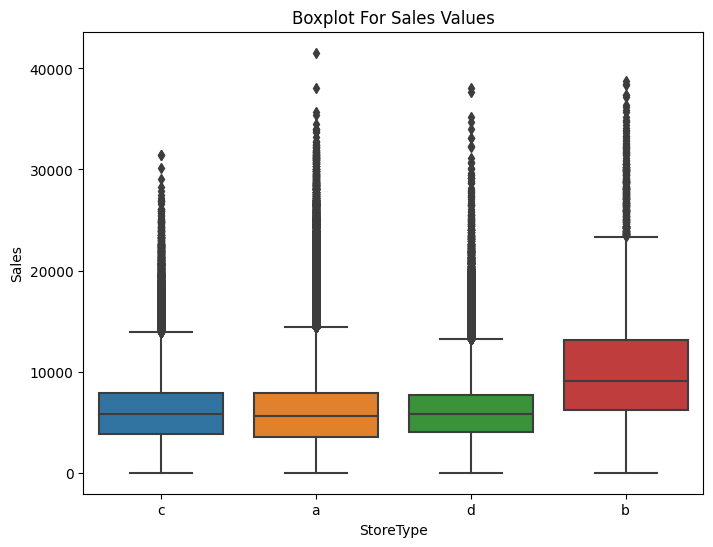

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(8, 6))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=df)
plt.title('Boxplot For Sales Values')

##### 1. Why did you pick the specific chart?

The specific chart chosen, a boxplot that displays the sales values grouped by store type, is an appropriate choice for several reasons:

**Comparison of Distributions:** The boxplot allows for a visual comparison of the distribution of sales values across different store types. By plotting the distribution of sales values for each store type side-by-side, it becomes easier to identify any variations, outliers, or common patterns among the different store types.

**Understanding Central Tendency and Variability:** The boxplot provides insights into the central tendency (median) and variability (interquartile range) of the sales values for each store type. It helps assess the range of values, identify potential outliers, and understand the spread of sales values within each store type category.

**Identification of Outliers:** The boxplot facilitates the identification of any extreme values or outliers for sales within each store type. These outliers may provide valuable insights into unusual or exceptional sales performance for specific store types, warranting further investigation or consideration in business strategies.

**Comparison of Skewness:** By examining the shape of the boxplot's whiskers and the positioning of the median line, characteristics such as skewness (asymmetry) in the sales values for each store type can be understood. This insight can help identify any distributional differences that might exist between store types, indicating potential variations in sales performance.

Overall, the boxplot is an effective choice for comparing the sales values across different store types. It provides a clear visual representation of the distribution, central tendency, variability, and presence of outliers or extreme values. This visualization aids in understanding and interpreting the sales performance for each store type, supporting informed decision-making in areas such as resource allocation, marketing strategies, and operational improvements.

##### 2. What is/are the insight(s) found from the chart?

The code generates a box plot to examine the relationship between the "StoreType" and "Sales" variables. Here are potential insights that can be derived from this chart:

**Variation in Sales by Store Type:** The box plot allows for a comparison of sales across different store types. Each box represents a store type, showing the distribution of sales values within that type. By comparing the positions and lengths of the boxes, you can identify variations in sales performance among different store types.

**Median Sales:** The horizontal line within each box represents the median (50th percentile) sales value for each store type. Comparing the medians can provide insights into the central tendency of sales and help identify store types that typically have higher or lower sales levels.

**Sales Distribution:** The box plot displays the interquartile range (IQR) for each store type through the height of the box. This allows for an understanding of the spread or distribution of sales values within each category. Store types with larger box heights indicate more variability in sales, while smaller box heights suggest more consistent sales performance.

**Outliers:** The box plot allows for identifying outliers, which are data points that fall outside the whiskers extending from the box. Outliers in sales values for different store types can provide insights into potential exceptional performance or unusual circumstances within those categories.

**Comparative Analysis:** By comparing the box heights, positions, and whisker lengths across the different store types, it becomes possible to gain insights into which store types tend to have higher or lower sales, as well as the degree of variability within each category. This comparative analysis can inform decision-making related to resource allocation, investment strategies, and overall business performance.

It's important to note that these insights are based on the assumption that "Sales" is the dependent variable and "StoreType" is the independent variable in the analysis. Additionally, interpretation should be done in conjunction with other relevant factors such as store size, location, marketing efforts, or competition, to gain a comprehensive understanding of the data.

Further analysis, statistical testing, and consideration of the context of the data would be necessary to draw firm conclusions and make informed business decisions based on the insights gained from this chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the box plot examining the relationship between "StoreType" and "Sales" can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

**Optimized Resource Allocation:** The box plot allows businesses to identify variations in sales performance among different store types. This can be valuable when making decisions about resource allocation such as staffing, inventory management, and marketing efforts. By understanding which store types tend to have higher sales, businesses can allocate resources more effectively, improving operational efficiency and potentially increasing sales.

**Informed Investment Strategies:** Insights from the box plot can guide investment decisions, as businesses can identify store types that consistently demonstrate higher sales levels. This information can support decisions related to expansion, renovation, or other strategic investments that focus on the store types with the most potential for growth.

**Competitive Analysis:** Comparing sales distributions across different store types in the box plot allows businesses to assess their performance relative to competitors. Understanding the strengths and weaknesses of each store type can assist in identifying areas for improvement and developing competitive strategies to enhance sales and market position.

**Negative Growth Factors to Consider:**

**Underperforming Store Types:** The box plot may reveal store types with consistently lower sales when compared to others. If this information is not addressed, it could lead to negative growth. Businesses must identify the reasons behind the underperformance, whether it's due to poor location, operational inefficiencies, or other factors, and take appropriate action to improve sales performance in these store types.

**Inefficient Resource Allocation:** While the box plot provides information on sales variations among store types, it's important to remember that correlation does not imply causation. A store type with higher sales might not necessarily be operating efficiently, so blindly allocating more resources to it could lead to negative growth. Businesses should analyze other factors such as profitability, return on investment, and operational considerations before making resource allocation decisions.

**Unidentified External Factors:** The box plot alone may not account for external factors that can influence sales across different store types. Market conditions, competitive landscape, consumer preferences, or economic factors can impact sales performance. Ignoring these external factors when interpreting the box plot insights may result in suboptimal strategies that lead to negative growth.

To create a positive business impact, it's crucial to consider the gained insights from the box plot alongside additional data sources, market research, and a comprehensive understanding of the context. Businesses should conduct further analysis, assess causality, and consider the broader business environment to make informed decisions that drive growth and mitigate potential negative implications.

#### Chart - 12 Store Type

In [11]:
merged_df = pd.merge(rossmann_df, store_df, on='Store', how='left')

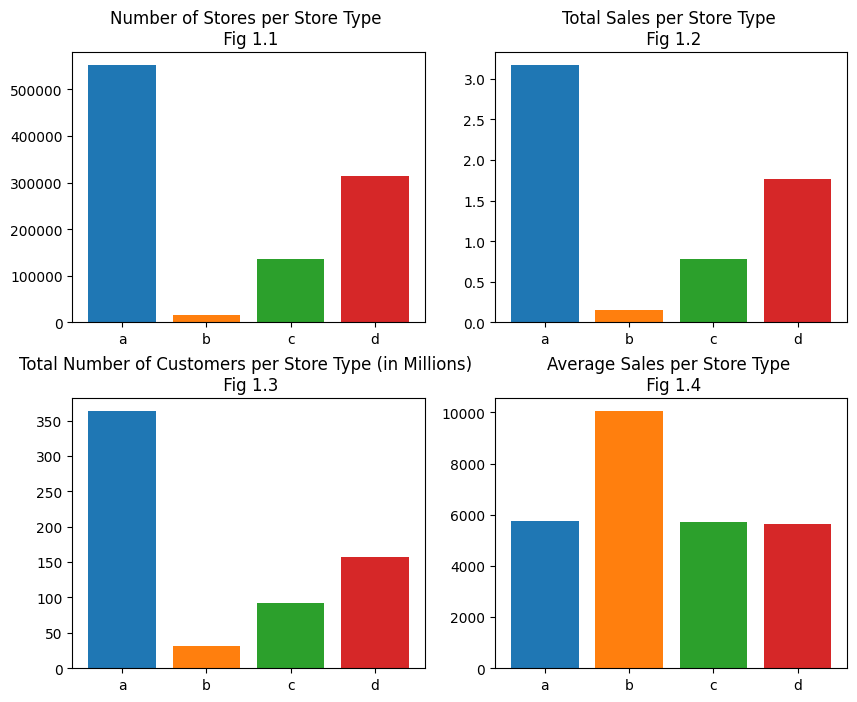

In [12]:
# Chart - 12 visualization code
import itertools
fig, axes = plt.subplots(2, 2,figsize=(10,8) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()



##### 1. Why did you pick the specific chart?

The code generates a subplot with four bar charts, each representing different aspects of the data grouped by "StoreType." Here's the justification for selecting this specific chart:

**Reason for choosing the bar chart with subplots:**

The bar chart with subplots is effective for visualizing and comparing multiple variables simultaneously. It allows for easy comparison across categories and enables the presentation of different metrics related to "StoreType" in a single figure. This type of chart is suitable when dealing with categorical variables like "StoreType" and provides a concise overview of multiple dimensions of the data at once.

**Justification for each specific chart:**

**Number of Stores per Store Type:** This chart (Fig 1.1) showcases a simple bar chart that displays the count of stores in each store type. It helps understand the distribution of stores across different types, providing insights into the scale and representation of each store type in the dataset.

**Total Sales per Store Type:** This chart (Fig 1.2) presents the sum of sales values for each store type. It helps identify the relative sales performance of different store types, highlighting which types generate higher or lower sales volumes.

**Total Number of Customers per Store Type:** This chart (Fig 1.3) illustrates the total number of customers for each store type, expressed in millions. It provides insights into the customer base associated with each store type, enabling comparisons and identifying customer reach across different types of stores.

**Average Sales per Store Type:** This chart (Fig 1.4) displays the average sales per store type. It allows for a comparison of the sales performance of different store types while neutralizing the impact of the number of stores or customer base.

Overall, this combination of bar charts provides a comprehensive view of the relationship between "StoreType" and various metrics such as store count, total sales, total customers, and average sales. It facilitates quick comparisons and highlights the variations across store types, aiding in understanding the differences, potential opportunities, and areas of concern related to different types of stores.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is when looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the bar charts comparing different metrics across "StoreType" can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

Identifying Store Type Distribution: The bar chart (Fig 1.1) provides insights into the distribution of stores across different types. This information can support strategic decisions related to store expansion, market penetration, and resource allocation. Understanding the store type distribution can help businesses target their efforts, allocate resources effectively, and optimize operations to maximize revenue and growth.

**Assessing Sales Performance:** The bar chart (Fig 1.2) allows businesses to compare the total sales across different store types. By identifying store types with higher sales volumes, businesses can prioritize investment and growth strategies in those areas. This insight can guide decisions related to inventory management, marketing initiatives, and store-level profitability analysis, ultimately leading to positive business impact.

**Understanding Customer Base:** The bar chart (Fig 1.3) provides information on the total number of customers for each store type. This insight helps businesses understand the customer base associated with different store types, enabling effective customer segmentation and targeted marketing efforts. By tailor-making strategies to meet the preferences and needs of specific customer segments, businesses can increase customer satisfaction, loyalty, and ultimately drive positive growth.

Negative Growth Factors to Consider:

**Underperforming Store Types**: If the bar chart (Fig 1.2) reveals certain store types with consistently lower total sales compared to others, it may indicate underperforming stores. Neglecting or failing to address this insight can lead to negative growth. It becomes crucial for businesses to analyze the underlying reasons for the underperformance, such as poor store locations, inefficient operations, inadequate product assortment, or pricing issues. Corrective actions can then be undertaken to improve performance and drive growth.

**Inefficient Resource Allocation:** The bar chart insights may reveal discrepancies in store count, total sales, or number of customers across different store types. An uneven distribution of resources or overemphasis on certain store types can negatively impact overall business performance. Businesses should assess resource allocation, taking into account the revenue potential and customer base associated with each store type. Balancing resources strategically can help optimize operations and ensure positive growth across all store types.

**Lack of Alignment with Customer Preferences:** The bar chart insights should be considered in conjunction with customer preferences. If the average sales per store type (Fig 1.4) reveals significant variations, it might indicate a mismatch between the assortment, pricing, or overall shopping experience offered by certain store types and the needs of customers. Identifying these misalignments and implementing adjustments to better cater to customer preferences can improve overall sales and growth potential.

Successful extraction of positive business impact requires careful analysis, integration of multiple insights, and consideration of contextual factors. By leveraging the gained insights from the bar charts, businesses can identify areas for improvement, align strategies accordingly, and take actions to drive positive growth while mitigating the negative implications.

#### Chart - 13

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

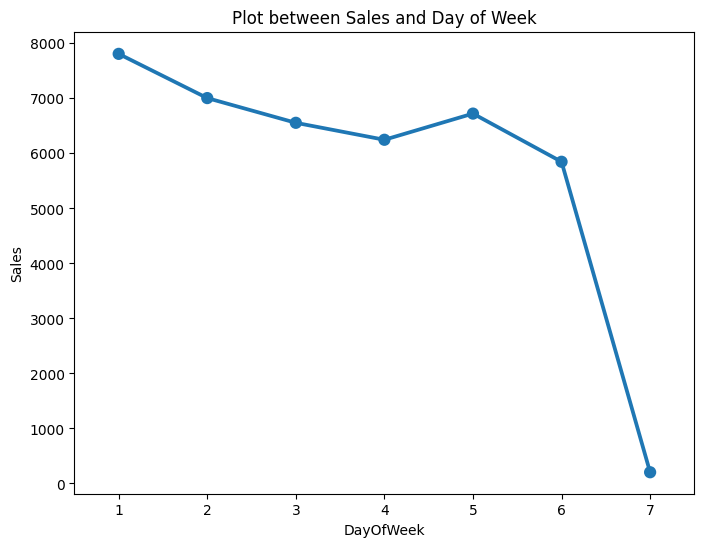

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(8,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=df)
plt.title('Plot between Sales and Day of Week')

##### 1. Why did you pick the specific chart?

The specific chart, a point plot displaying the relationship between "Sales" and "DayOfWeek," was chosen based on the provided code. Here's the justification for selecting this specific chart:

**Reason for choosing the point plot:**

The point plot is a suitable choice when visualizing the relationship between a continuous variable (in this case, "Sales") and a categorical variable (in this case, "DayOfWeek"). It displays the central tendency (typically the mean value) and confidence intervals for each category level. This type of plot helps to understand the variation in sales across different days of the week.

**Justification for the specific chart:**

The point plot chosen provides valuable insights into the relationship between sales and the day of the week. Here's why it was chosen:

**Visualizing Sales Patterns:** The point plot displays the mean sales for each day of the week, represented by the points on the plot. This allows for easy comparison and identification of trends or patterns in sales across different days of the week. By examining the distribution of points and the line segments (confidence intervals) associated with each point, it becomes possible to identify which days tend to have higher or lower mean sales.

**Day-of-Week Impact:** The choice of day of the week is significant in retail operations, as sales might vary depending on factors like weekday vs. weekend sales. The point plot helps evaluate whether specific days exhibit consistent patterns or if sales fluctuate significantly across different days of the week. This information can influence staffing decisions, promotional activities, and overall business operations.

**Comparative Analysis:** The point plot enables easy comparison between different days of the week. By observing the relative heights of the points or the overlapping of confidence intervals, one can identify any significant differences in mean sales between weekdays or weekends. This comparative analysis can inform marketing strategies, inventory management, staff scheduling, or adjustments to pricing strategies.

**Identifying Peaks and Valleys:** The point plot can reveal days that consistently show higher sales (peaks) or lower sales (valleys). Identifying these patterns allows businesses to capitalize on high-sales days by adjusting promotions, optimizing inventory levels, focusing marketing efforts, or providing additional staffing support. Conversely, recognizing days with lower sales enables businesses to strategize tactics to boost sales during those periods.

**Data Distribution:** The point plot also provides information about the uncertainty in the mean sales estimate through the line segments (confidence intervals). Wider intervals imply greater variability in sales for a particular day of the week, while narrower intervals indicate more consistent sales performance.

Overall, the selected point plot helps visualize and explore the relationship between "Sales" and "DayOfWeek," enabling insights into sales patterns, comparative analysis, and identifying days with higher or lower sales. It assists businesses in making informed decisions related to staffing, inventory management, marketing strategies, and optimizing sales growth potential.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart is Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the point plot showcasing the relationship between "Sales" and "DayOfWeek" can potentially help create a positive business impact. Here's an assessment of the potential positive impact and any insights that might lead to negative growth:

**Positive Business Impact:**

Optimized Operations: The point plot allows businesses to identify sales patterns and trends across different days of the week. This insight enables businesses to optimize operations by allocating resources, adjusting staffing levels, and tailoring marketing strategies to align with high-sales days. By capitalizing on the days that consistently exhibit higher sales, businesses can maximize revenue and improve overall profitability.

**Promotional Strategies:** Understanding the sales variations across different days of the week enables businesses to strategically plan and implement promotional activities. By aligning promotions with lower-sales days, businesses can stimulate customer interest, drive traffic, and increase sales on those days. This tactic helps balance sales distribution, reduce fluctuations, and achieve positive growth.

**Negative Growth Factors to Consider:**

Asymmetric Sales Distribution: The point plot might reveal drastic differences in sales between specific days of the week. If there is a significant imbalance, with a few days dominating sales while others consistently underperform, it can lead to negative growth. Overreliance on a few high-sales days might result in missed opportunities on the lower-sales days. Businesses should strive for a more balanced sales distribution across the days of the week to avoid potential revenue gaps.

**Ineffective Strategies:** In some cases, the point plot may show unpredictable or inconsistent sales patterns across different days of the week. This variability might indicate difficulties in accurately predicting demand or targeting specific customer segments. Such inconsistencies pose challenges for operational planning and can lead to negative growth if there is a lack of effective strategies to address these fluctuations. Businesses should carefully analyze the underlying factors driving the inconsistencies and develop tailored strategies to mitigate their impact.

**Inefficient Resource Allocation:** The insights from the point plot can uncover days of the week with consistently lower sales. If resources, such as staff scheduling or inventory management, are not adjusted to match the lower demand on those specific days, it can result in inefficient resource allocation and negative growth. By aligning resources with sales patterns, businesses can optimize operations, reduce costs, and improve profitability across all days of the week.

It's important to note that the impact of the gained insights on positive business outcomes depends on how these insights are interpreted, integrated with other relevant factors, and translated into actionable strategies. By effectively leveraging the insights from the point plot, businesses can make informed decisions to optimize operations, deploy tailored promotional strategies, and allocate resources efficiently to drive positive growth.

#### Chart - 14 - Correlation Heatmap

In [13]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

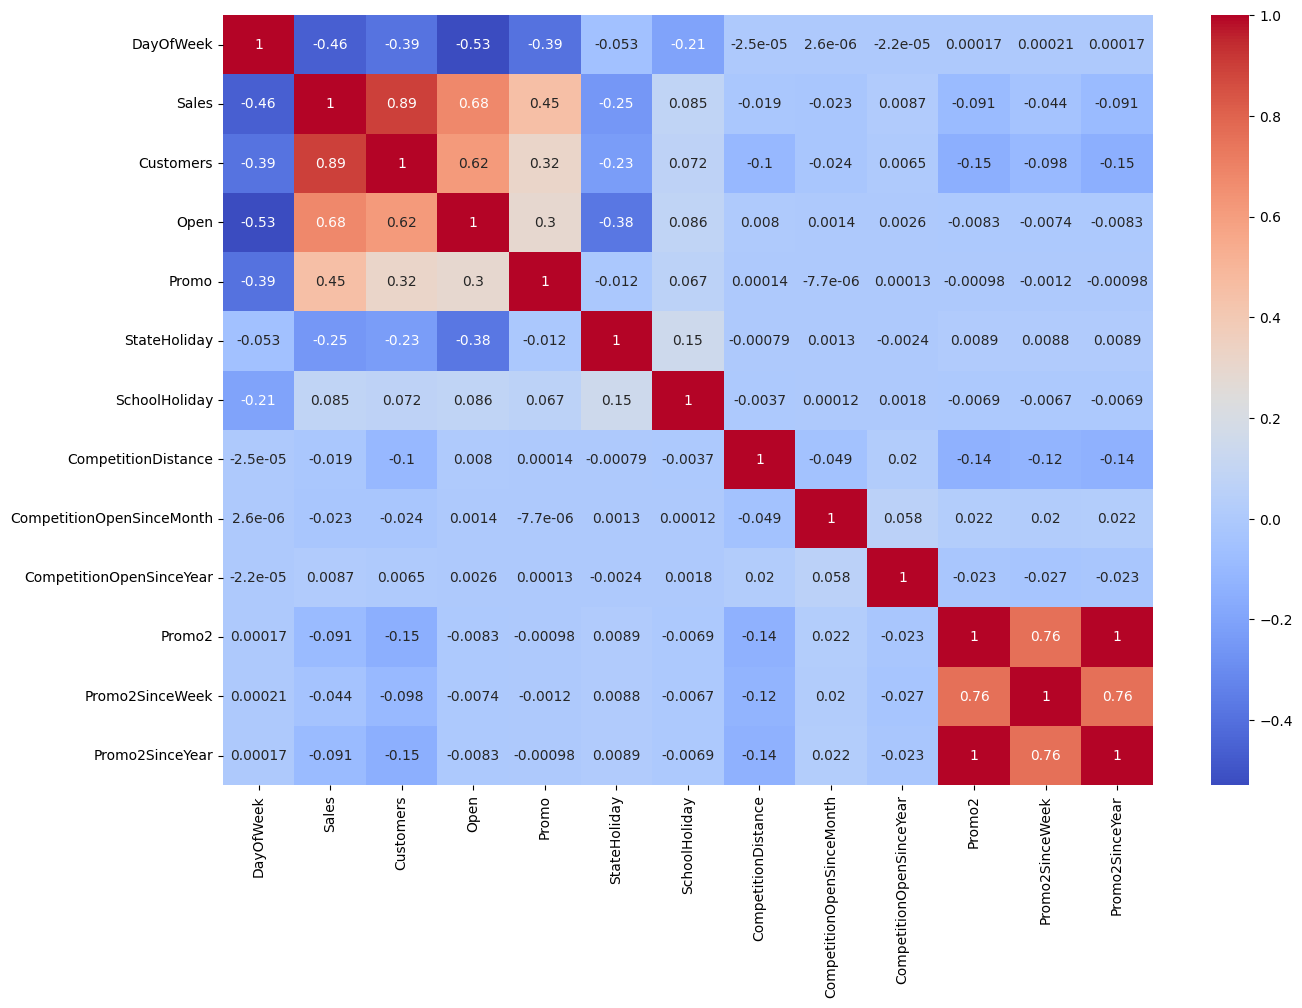

In [14]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

The specific chart, a heatmap of the correlation matrix, was chosen to visualize the correlations between numerical variables in the dataset after dropping the 'Store' column and converting the 'StateHoliday' column to numeric values. Here's the rationale for picking this chart:

**Visualizing Correlations:** The heatmap is effective for visualizing the correlation matrix, which shows the pairwise correlations between numerical variables. By utilizing color gradients and annotations, the heatmap allows for a quick assessment of the strength and direction of correlations among variables.

**Identifying Relationships:** The heatmap helps in identifying both positive and negative correlations between variables. Positive correlations indicate that the variables increase or decrease together, while negative correlations suggest they move in opposite directions. This insight can be valuable for understanding the relationships between variables and identifying potential influential factors.

**Efficient Presentation:** The heatmap is a compact and clear representation of the correlation matrix. It displays multiple correlations simultaneously, making it easier to detect patterns and identify strong, weak, or negligible correlations. The addition of annotations further enhances the interpretability of the heatmap.

In summary, the heatmap of the correlation matrix was chosen to visually explore and understand the relationships between numerical variables in the dataset. This chart allows for quick identification of correlated variables and provides insights into the direction and strength of those correlations. It helps highlight variables that may have a significant impact on each other and can guide decisions related to feature selection, identifying potential drivers of business performance, and further analysis such as regression modeling or variable transformations.

##### 2. What is/are the insight(s) found from the chart?

Insights which are derived from the chart as mentioned below:

Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.

State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.

There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

#### Chart - 15 - Pair Plot

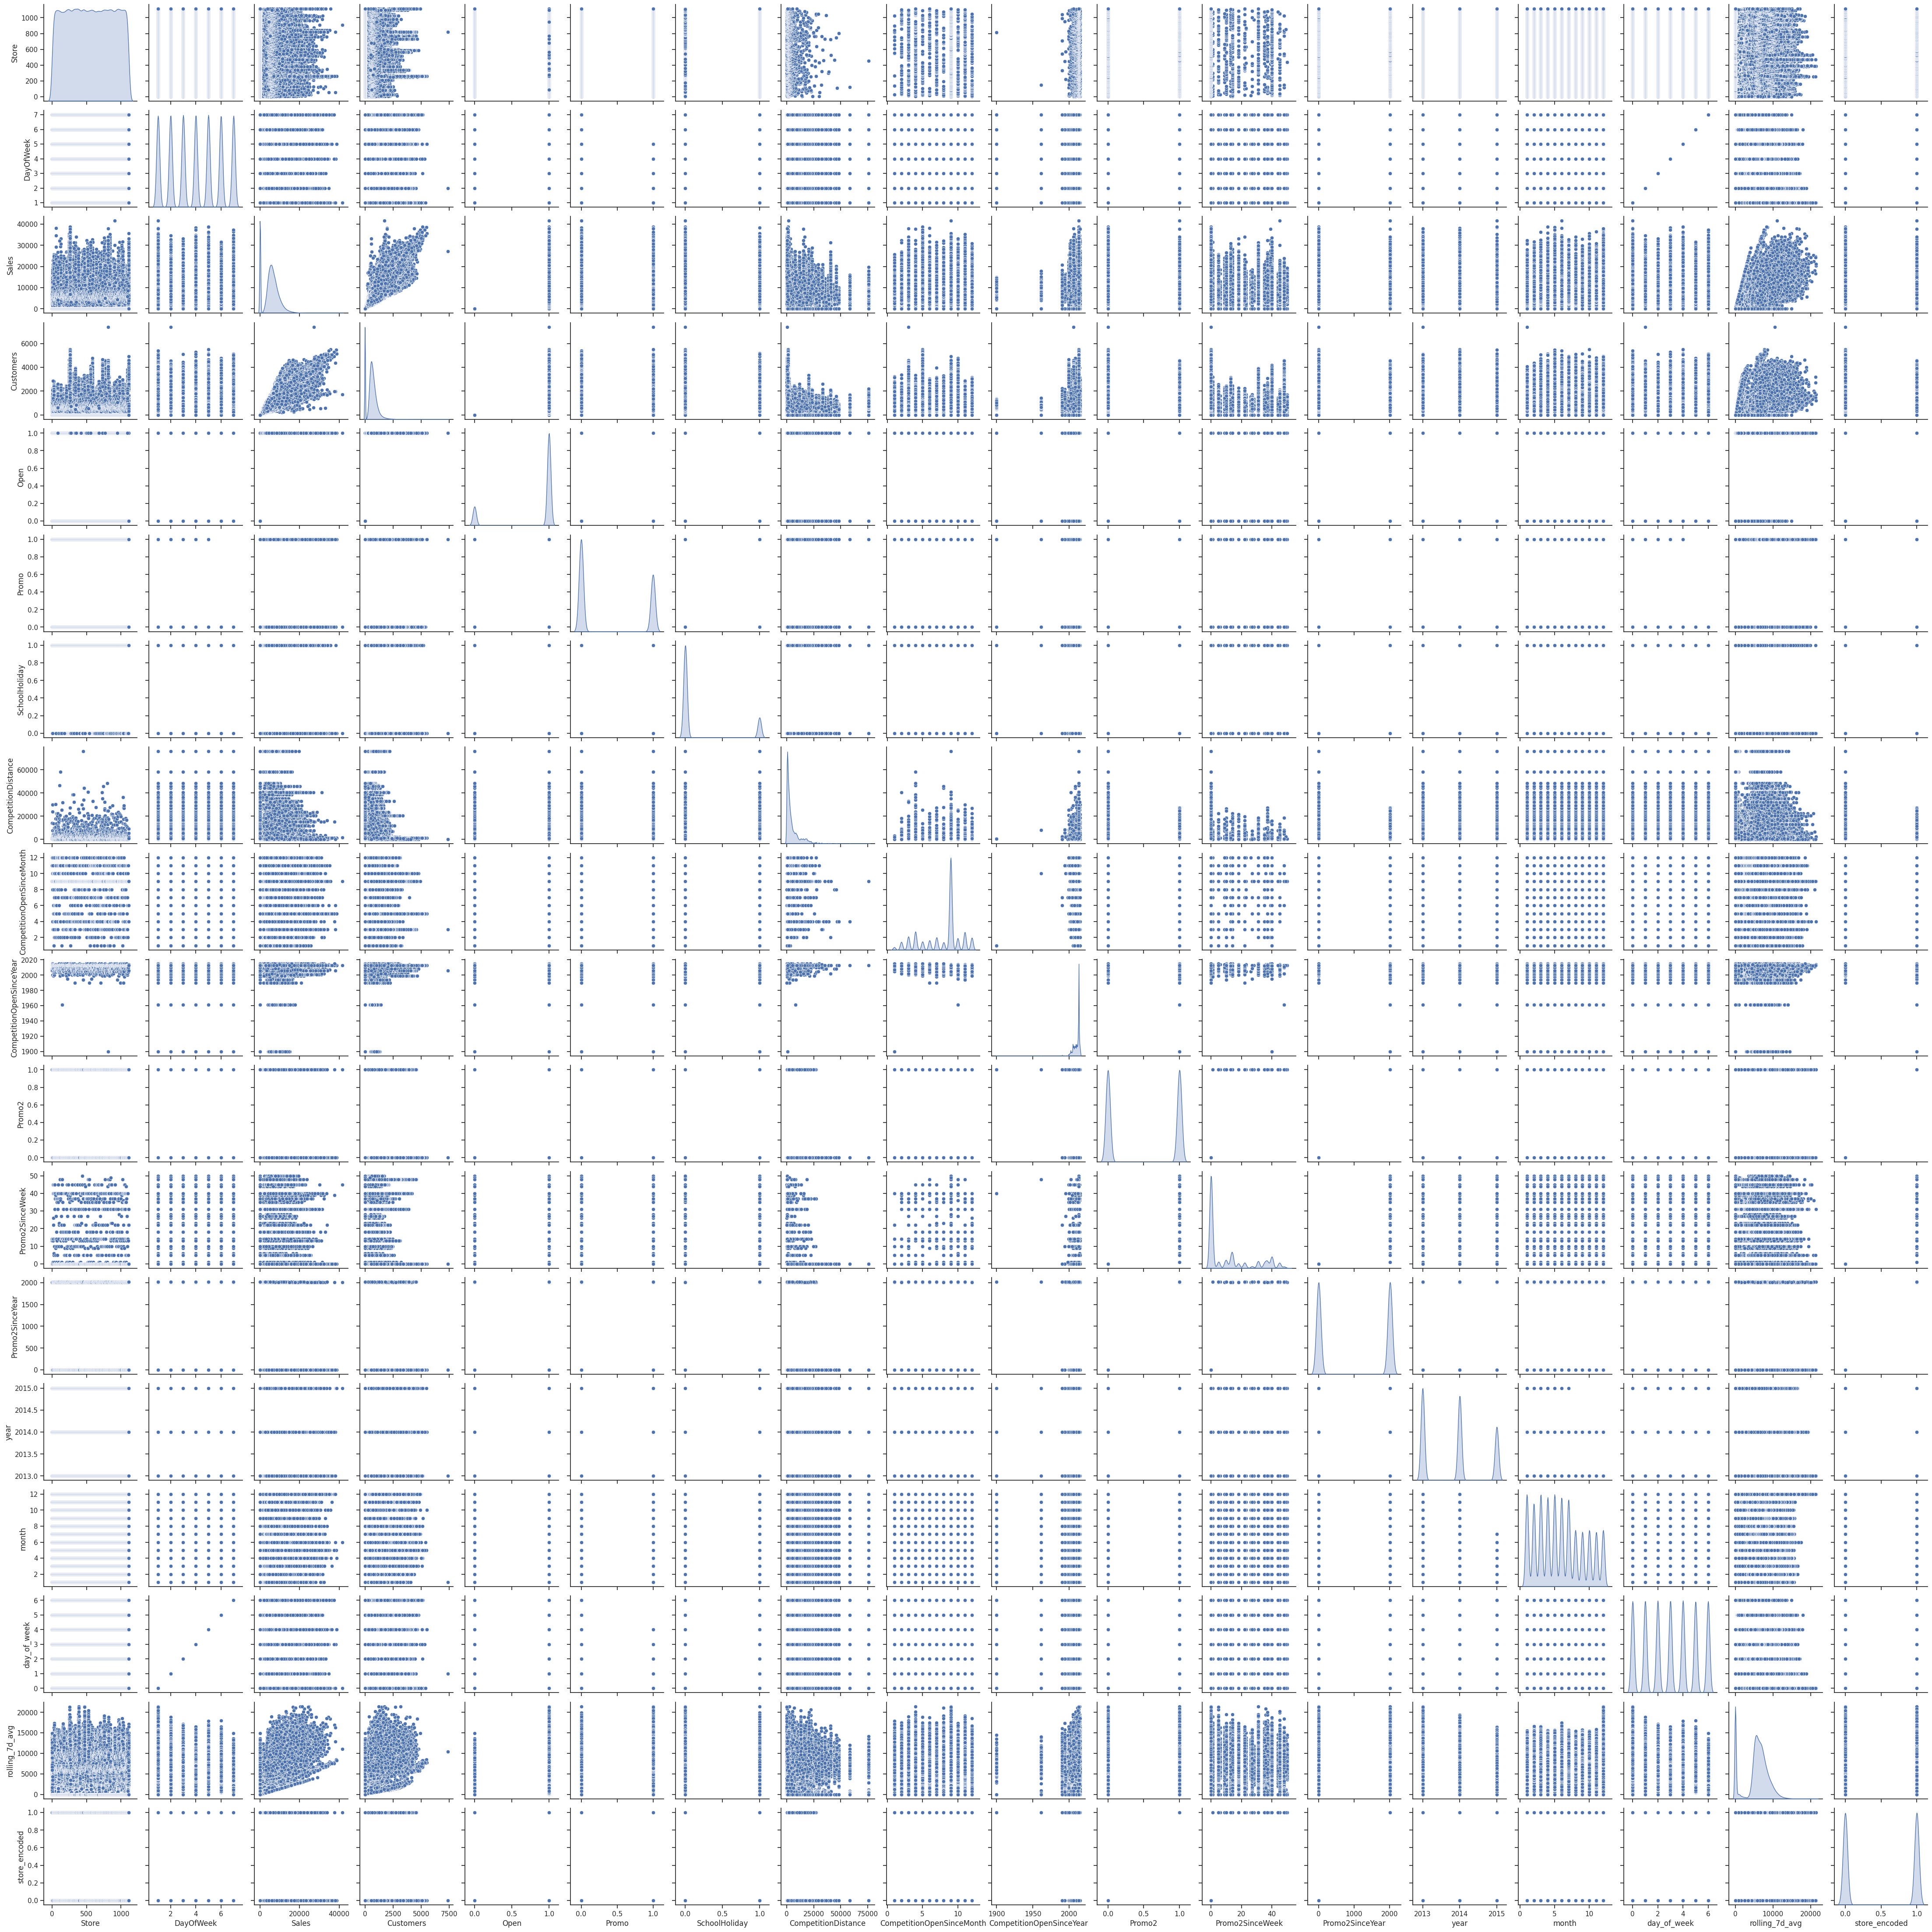

In [ ]:
# Pair Plot visualization code
sns.set(style="ticks", color_codes=True)
df = rossmann_df.merge(right=store_df, on="Store", how="left")
sns.pairplot(df, diag_kind="kde")

plt.show()

##### 1. Why did you pick the specific chart?

The code snippet i provided is creating a pair plot using seaborn's pairplot() function on the retail_df dataframe. Pair plots are often used to visualize the pairwise relationships between multiple variables in a dataset.

The specific chart, which is a pair plot, can be helpful in understanding the relationships between different variables in the retail_df dataframe. Here are some reasons why this chart might be useful:

**Correlation:** The scatter plots in the pair plot allow you to visualize the correlation between different pairs of variables. You can identify whether there are positive or negative correlations or if there is no apparent relationship between variables. This can help in understanding how variables are related to each other.

**Distributions:** The diagonal plots in the pair plot display the distributions of individual variables. The KDE (Kernel Density Estimate) curve on the diagonal represents the estimated probability density function of each variable. This can help in identifying the shape, spread, and potential outliers in the data.

**Outliers:** Outliers can be identified in the scatter plots as data points that significantly deviate from the general trend or pattern. Detecting outliers visually can provide insights into unusual or extreme data points that may require further investigation.

**Pattern Recognition:** The pair plot can assist in identifying distinct patterns, clusters, or groupings in the data. Clusters or groups of points in the scatter plots can suggest relationships or dependencies between variables.


##### 2. What is/are the insight(s) found from the chart?

I can provide you with some general insights that can often be gained from a pair plot analysis.

A pair plot allows you to visualize the pairwise relationships between different variables in the dataset. Here are some potential insights you can obtain from the chart:

**Distributions:** The diagonal plots in the pair plot display the distribution of each variable. You can observe the shape, spread, and potential outliers in the data. This can help identify if the variables follow specific distributions (e.g., normal distribution) or have skewed or multimodal distributions.

**Correlations:** The scatter plots in the pairs of variables can provide insights into the linear relationships between them. You can look for patterns such as positive, negative, or no correlation. Strong correlations between variables can indicate dependencies or predictability in the data.

**Clusters or Groups:** In some cases, you may observe groupings or clusters in the scatter plots. This suggests that certain variables tend to have similar values within certain ranges, indicating potential subgroups or patterns in the data.

**Outliers:** Outliers can be identified in scatter plots as points that deviate significantly from the general trend or pattern. These outliers may need to be investigated further as they could provide valuable insights or indicate potential data quality issues.

**Distribution Shape:** The kernel density estimates (kde) on the diagonal plots can provide insights into the shape of the distribution for each variable. You can examine whether the distributions are skewed, bimodal, or have other distinct shapes.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypotheses**

Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:

The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.

Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.

Stores are influenced by seasonality, probably before holidays sales would be high.

It is clear that most of the stores remain closed during State and School Holidays.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no relationship between Sales and SchoolHoliday.

Alternate Hypothesis (H1): There is relationship between Sales and SchoolHoliday.

#### 2. Perform an appropriate statistical test.

In [15]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = rossmann_df['Sales']
Schoolholiday= rossmann_df['SchoolHoliday']

correlation, p_value = pearsonr(sales, Schoolholiday)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and SchoolHoliday.")

Pearson correlation coefficient: 0.08512403767585747
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in your code is the Pearson correlation test. The pearsonr function from scipy.stats module is specifically used for calculating the Pearson correlation coefficient and the associated p-value.

The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables. The p-value associated with the correlation coefficient tests the null hypothesis that there is no correlation between the variables in the population.

By conducting the Pearson correlation test between the sales and SchoolHoliday variables, we are assessing whether there is a statistically significant linear relationship between these two variables in the population. If the p-value is less than your chosen level of significance (alpha), you reject the null hypothesis and conclude that there is a significant relationship between Sales and SchoolHoliday. On the other hand, if the p-value is greater than alpha, you accept the null hypothesis and conclude that there is no significant relationship between the variables.

##### Why did you choose the specific statistical test?

The specific statistical test, Pearson correlation test, was chosen based on the nature of the analysis we intended to perform and the type of variables involved.

The Pearson correlation test is commonly used to measure the strength and direction of a linear relationship between two continuous variables. It is suitable when we want to assess whether there is a linear association between two quantitative variables and want to determine the significance of that association.

In our case, we are examining the relationship between the Sales and SchoolHoliday variables. Both of these variables represent quantitative data, and we are interested in determining whether there is a linear correlation between them.

The Pearson correlation test was chosen because it specifically measures the strength and significance of the linear relationship between two continuous variables. By using this test, we can calculate the correlation coefficient (r) and obtain the associated p-value, providing insights into whether the observed correlation is statistically significant.

### Hypothetical Statement - 2

There's a positive correlation between customers and sales which is explanatory.

Here it can be reduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

The positive effect of promotion on Customers and Sales is observable.

Customers would have a positive correlation with Sales.

Promotion should be having a positive correlation with Sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no relationship between Sales and Customers.

Alternate Hypothesis (H1): There is relationship between Sales and Customers.

#### 2. Perform an appropriate statistical test.

In [16]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = rossmann_df['Sales']
customers = rossmann_df['Customers']

correlation, p_value = pearsonr(sales, customers)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Customers.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Customers.")

Pearson correlation coefficient: 0.8947107733017134
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and Customers.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in the given code is still the Pearson correlation test. The pearsonr function from the scipy.stats module is being used to calculate the Pearson correlation coefficient and the associated p-value.

The Pearson correlation test is commonly used to assess the strength and significance of the linear relationship between two continuous variables. In this case, we are interested in examining the relationship between the Sales and Customers variables, both of which are quantitative and continuous.

By conducting the Pearson correlation test between these variables, we are determining whether there is a statistically significant linear relationship between the number of Sales and the number of Customers. The p-value obtained from the test indicates the probability of observing a correlation as extreme as the one observed in the sample, assuming the null hypothesis (no correlation) is true.

If the p-value is less than your chosen significance level (alpha), typically 0.05, it suggests that there is a significant linear relationship between Sales and Customers. In this case, you would reject the null hypothesis and conclude that there is evidence of a relationship between the two variables. Conversely, if the p-value is greater than alpha, we would fail to reject the null hypothesis, indicating no significant relationship between Sales and Customers.

Thus, in summary, the statistical test used is the Pearson correlation test to determine the significance of the linear relationship between Sales and Customers.

##### Why did you choose the specific statistical test?

The specific statistical test, Pearson correlation test, was chosen based on the type of data and the research question being addressed.

The Pearson correlation test is used to measure the strength and direction of a linear relationship between two continuous variables. It is appropriate when we want to assess whether there is a linear association between two quantitative variables and determine the significance of that association.

In our case, we are interested in examining the relationship between the Sales and Customers variables, both of which represent continuous quantitative data. The question i want to answer is whether there is a linear correlation between the number of sales and the number of customers.

By using the Pearson correlation test, we can calculate the correlation coefficient (r) between Sales and Customers and obtain the corresponding p-value. The p-value represents the probability of observing a correlation as extreme as the one observed in the sample, assuming there is no actual correlation in the population.

The choice of the Pearson correlation test is appropriate because it specifically measures the strength, direction, and significance of the linear relationship between continuous variables. It allows you to quantify the association between Sales and Customers and determine whether it is statistically significant.

### Hypothetical Statement - 3

Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the hypothesis.

The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no relationship between Sales and Day of Week.

Alternate Hypothesis (H1): There is relationship between Sales and Day of Week.

#### 2. Perform an appropriate statistical test.

In [17]:
# Perform Statistical Test to obtain P-Value
sales = rossmann_df['Sales']
dayofweek = rossmann_df['DayOfWeek']

correlation, p_value = pearsonr(sales, dayofweek)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and DayOfWeek.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and DayOfWeek.")


Pearson correlation coefficient: -0.46212502322725896
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and DayOfWeek.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value in the given code is still the Pearson correlation test. The pearsonr function from the scipy.stats module is being used to calculate the Pearson correlation coefficient and the associated p-value.

The Pearson correlation test is commonly used to assess the strength and significance of the linear relationship between two continuous variables. In this case, we are interested in examining the relationship between the Sales and DayOfWeek variables.

By conducting the Pearson correlation test between these variables, we are determining whether there is a statistically significant linear relationship between the sales and the day of the week. The p-value obtained from the test indicates the probability of observing a correlation as extreme as the one observed in the sample, assuming the null hypothesis (no correlation) is true.

If the p-value is less than your chosen significance level (alpha), typically 0.05, it suggests that there is a significant linear relationship between Sales and DayOfWeek. In this case, we would reject the null hypothesis and conclude that there is evidence of a relationship between the two variables. Conversely, if the p-value is greater than alpha, we would fail to reject the null hypothesis, indicating no significant relationship between Sales and DayOfWeek.

Thus, in summary, the statistical test used is the Pearson correlation test to determine the significance of the linear relationship between Sales and DayOfWeek.

##### Why did you choose the specific statistical test?

The Pearson correlation statistical test is chosen when we want to assess the strength, direction, and significance of the linear relationship between two continuous variables.

In the given scenario where we are analyzing the relationship between Sales and DayOfWeek, both of these variables represent continuous data.

The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to +1, where -1 indicates a perfect negative linear relationship, +1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

The Pearson correlation test allows you to calculate the correlation coefficient (r) between Sales and DayOfWeek and obtain the associated p-value. The p-value represents the probability of observing a correlation as extreme as the one observed in the sample, assuming that there is no true correlation in the population.

By conducting the Pearson correlation test, we can assess the significance of the linear relationship between Sales and DayOfWeek. If the obtained p-value is below a chosen threshold (commonly 0.05 or 0.01), it indicates that the observed correlation is statistically significant, providing evidence of a linear relationship. Conversely, if the p-value is higher than the threshold, it suggests that there is insufficient evidence to conclude a significant linear relationship.

Therefore, the Pearson correlation test is chosen in this case because it is specifically designed to analyze the linear association between continuous variables and determine its statistical significance.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 18)

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [18]:
#since the stores closed had 0 sale value; removing the irrelevant part putting into df1 variable
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [ ]:
# check
df1.head(1)

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0             0

<Axes: ylabel='Density'>

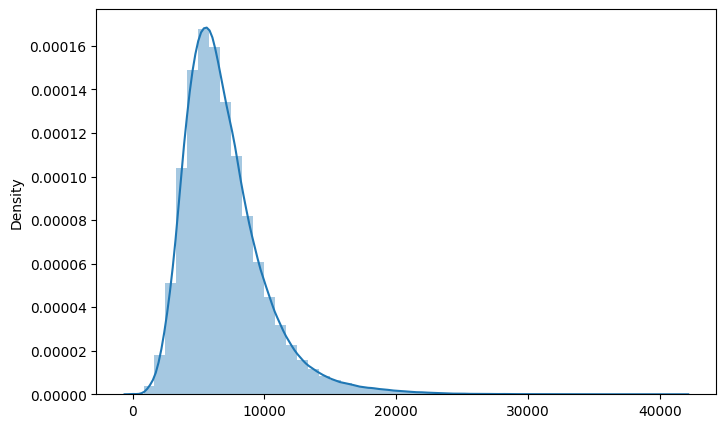

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df1['Sales'])

### 1. Handling Missing Values

In [19]:
# Import the required libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Putting the dataframe into a new variable called data
data = df

# Identify missing values
missing_values = data.isnull().sum()

# Impute missing values for numeric columns with mean imputation
numeric_columns = ['Sales', 'Customers']
imputer_mean = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_mean.fit_transform(data[numeric_columns])

# Impute missing values for categorical columns with mode imputation
categorical_columns = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_mode.fit_transform(data[categorical_columns])

# Drop remaining rows with missing values
data.dropna(axis=0, inplace=True)

# Verify if missing values have been properly handled
print(data.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

In the code snippet, missing value imputation is performed using two techniques:

**Mean imputation for numeric columns:** The code uses the SimpleImputer class from scikit-learn to impute missing values in numeric columns ('Sales' and 'Customers') using the mean value of each respective column. Mean imputation is a frequently used technique, assuming that the missing values are missing at random and can be estimated reasonably well using the mean.

**Mode imputation for categorical columns:** The code uses the same SimpleImputer class to impute missing values in categorical columns ('CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval') using the mode (most frequent value) of each respective column. Mode imputation is suitable for categorical variables, assuming that the missing values can be filled with the most common category.

After performing the imputations, any remaining rows with missing values are dropped using df.dropna(). This is done to ensure that the dataset is cleaned and does not contain any missing values.

I have selected mean imputation for numeric columns because it is a simple and widely-used approach, allowing you to preserve the distribution of the variable. And for categorical columns, mode imputation is appropriate as it allows you to choose the most common category to fill in the missing values.

### 2. Handling Outliers

Total number of Outliers present in the Sales column are 13437.


[Text(0.5, 1.0, 'Outliers Distribution')]

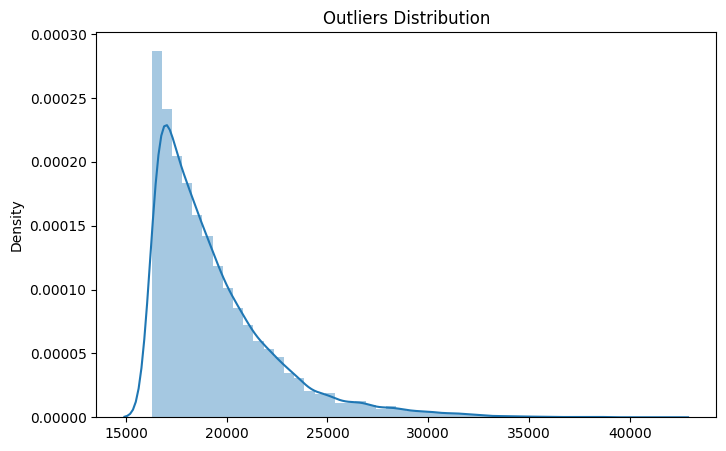

In [20]:
# Handling Outliers & Outlier treatments
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

##### What all outlier treatment techniques have you used and why did you use those techniques?

The code implements an outlier treatment technique known as Z-score method. This method identifies outliers by calculating the Z-score for each data point in the "Sales" column and comparing it to a specified threshold (in this case, 3). If the Z-score exceeds the threshold, the data point is considered an outlier and added to the outliers list.

The Z-score method is commonly used to identify outliers based on their deviation from the mean in terms of standard deviations. Outliers that are more than 3 standard deviations away from the mean are typically considered extreme outliers.

In terms of outlier treatment techniques, the provided code focuses on identifying and separating outliers rather than performing actual treatment. However, once outliers are identified using the Z-score method, various outlier treatment techniques can be applied based on the specific circumstances and objectives of the analysis.

Some common outlier treatment techniques include:

**Deletion:** In some cases, outliers may be removed from the dataset entirely if they are determined to be erroneous data or if their impact on the analysis is deemed significantly detrimental. However, caution must be exercised when deleting outliers, as it may result in loss of information and potential bias in subsequent analyses.

**Transformation:** Outliers can be treated by transforming the data using mathematical functions such as logarithmic, square root, or reciprocal transformations. These transformations can help normalize the distribution, lessen the effect of extreme values, and improve the applicability of statistical techniques that assume normality.

**Capping/Flooring:** Outliers can be replaced with predetermined upper or lower threshold values, often referred to as capping or flooring respectively. This technique limits the impact of outliers while retaining the rest of the data points within a specified range. Capping/flooring is useful when extreme values are likely to occur but need to be controlled for analysis purposes.

**Winsorization:** Winsorization replaces outliers with values located at a specified percentile (e.g., replacing values above the 95th percentile with the value at the 95th percentile). This technique reduces the impact of outliers but retains some information from the extreme values.

**Model-based Methods:** Outliers can be treated using model-based methods such as robust regression or outlier detection algorithms. These techniques identify and adjust for outliers while considering the relationships and patterns in the data.


In [21]:
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
5659        85          7  2015-07-26  11421       1606      0            0   
5833       259          7  2015-07-26  15998       2857      0            0   
5836       262          7  2015-07-26  32547       4783      0            0   
5848       274          7  2015-07-26   7750       1608      0            0   
5909       335          7  2015-07-26   7988       1509      0            0   
...        ...        ...         ...    ...        ...    ...          ...   
1011201    682          7  2013-01-06   6228       1077      0            0   
1011252    733          7  2013-01-06  11226       2584      0            0   
1011288    769          7  2013-01-06   6995       1764      0            0   
1011467    948          7  2013-01-06   6024       1402      0            a   
1011616   1097          7  2013-01-06   8258       2003      0            0   

         SchoolHoliday StoreType Assortment  CompetitionDistance  \
5659                 0         b          a               1870.0   
5833                 0         b          b                210.0   
5836                 0         b          a               1180.0   
5848                 0         b          b               3640.0   
5909                 0         b          a                 90.0   
...                ...       ...        ...                  ...   
1011201              0         b          a                150.0   
1011252              0         b          b                860.0   
1011288              0         b          b                840.0   
1011467              0         b          b               1430.0   
1011616              0         b          b                720.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
5659                          10.0                    2011.0       0   
5833                           9.0                    2013.0       0   
5836                           5.0                    2013.0       0   
5848                           9.0                    2013.0       1   
5909                           9.0                    2013.0       1   
...                            ...                       ...     ...   
1011201                        9.0                    2006.0       0   
1011252                       10.0                    1999.0       0   
1011288                        9.0                    2013.0       1   
1011467                        9.0                    2013.0       0   
1011616                        3.0                    2002.0       0   

         Promo2SinceWeek  Promo2SinceYear    PromoInterval  
5659                 0.0              0.0                0  
5833                 0.0              0.0                0  
5836                 0.0              0.0                0  
5848                10.0           2013.0  Jan,Apr,Jul,Oct  
5909                31.0           2013.0  Jan,Apr,Jul,Oct  
...                  ...              ...              ...  
1011201              0.0              0.0                0  
1011252              0.0              0.0                0  
1011288             48.0           2012.0  Jan,Apr,Jul,Oct  
1011467              0.0              0.0                0  
1011616              0.0              0.0                0  

[2216 rows x 17 columns]

In [22]:
df1.shape

(844392, 17)

In [23]:
#just in case something messes up
df2 = df1.copy()

In [24]:
df2.head(1)

Store  DayOfWeek        Date  Sales  Customers  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0             0

In [25]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [26]:
#check
df2.head(1)

Store  DayOfWeek        Date  Customers  Promo StateHoliday  SchoolHoliday  \
0      1          5  2015-07-31        555      1            0              1   

  StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   

  PromoInterval  Sales  
0             0   5263

In [27]:
#check end
df2.tail(1)

Store  DayOfWeek        Date  Customers  Promo StateHoliday  \
1017190   1097          2  2013-01-01       1405      0            a   

         SchoolHoliday StoreType Assortment  CompetitionDistance  \
1017190              1         b          b                720.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1017190                        3.0                    2002.0       0   

         Promo2SinceWeek  Promo2SinceYear PromoInterval  Sales  
1017190              0.0              0.0             0   5961

In [28]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [29]:
# Set the DataFrame index as a DatetimeIndex if not already done
df2.index = pd.to_datetime(df2.index)
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [30]:
# Encode your categorical columns
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# Use Pandas get_dummies for one-hot encoding
encoded_df = pd.get_dummies(df1, columns=categorical_cols)

# We can also drop the original categorical columns if needed
# encoded_df = encoded_df.drop(columns=['DayOfWeek','StoreType', 'Assortment'])
# Display the encoded dataframe
print(encoded_df)

         Store        Date  Sales  Customers  Promo StateHoliday  \
0            1  2015-07-31   5263        555      1            0   
1            2  2015-07-31   6064        625      1            0   
2            3  2015-07-31   8314        821      1            0   
3            4  2015-07-31  13995       1498      1            0   
4            5  2015-07-31   4822        559      1            0   
...        ...         ...    ...        ...    ...          ...   
1016776    682  2013-01-01   3375        566      0            a   
1016827    733  2013-01-01  10765       2377      0            a   
1016863    769  2013-01-01   5035       1248      0            a   
1017042    948  2013-01-01   4491       1039      0            a   
1017190   1097  2013-01-01   5961       1405      0            a   

         SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0                    1               1270.0                        9.0   
1                    1             

#### What all categorical encoding techniques have you used & why did you use those techniques?

The code demonstrates the usage of the One-Hot Encoding technique to encode categorical features in the dataset. One-Hot Encoding is a common technique used to transform categorical variables into a numerical format that machine learning models can work with.

In the code snippet, the columns 'DayOfWeek', 'StoreType', and 'Assortment' are identified as categorical features that need to be encoded. Here's an explanation of why One-Hot Encoding is used and some alternative categorical encoding techniques:

**One-Hot Encoding:** One-Hot Encoding is used in this code to transform each categorical feature into multiple binary columns, where each column represents a unique category. For example, if 'DayOfWeek' has values Monday to Sunday, seven binary columns (one for each day) will be created, with a value of 1 indicating the presence of that day and 0 otherwise. One-Hot Encoding is appropriate when the categorical variables are nominal (without any inherent order), and each category is mutually exclusive.

**Label Encoding:** Label Encoding is an alternative categorical encoding technique where each category is mapped to a unique integer label. This method assigns different integer values to different categories. However, it is important to note that Label Encoding may introduce an ordinal relationship between the categories that does not exist inherently in the data. Hence, Label Encoding is suitable when the categorical variable has an inherent order or a natural ranking.

**Binary Encoding:** Binary Encoding is another technique that converts each category into its binary representation based on its unique combination of values. This technique uses fewer columns compared to One-Hot Encoding, resulting in a more compact representation. Binary Encoding is useful when dealing with high-cardinality categorical variables to reduce the dimensionality and memory footprint of the dataset while preserving valuable information.

The choice of categorical encoding technique depends on the specific characteristics of the dataset, the relationship between categories, and the requirements of the machine learning algorithm being used. One-Hot Encoding is a widely used technique for nominal categorical variables, as it preserves categorical information without introducing ordinal relationships.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Contractions are not applicable because their are not any text data in both the dataset.

#### 2. Lower Casing

In [31]:
# Lower Casing
# Convert the values in the 'Sales' column to string type
df['Sales'] = df['Sales'].astype(str)

# Convert the values to lowercase
df['Sales'] = df['Sales'].str.lower()

#### 3. Removing Punctuations

In [32]:
# Remove Punctuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#### 4. Removing URLs & Removing words and digits contain digits.

In [33]:
# Remove URLs & Remove words and digits contain digits
df['Sales'][0]

'5263.0'

There is no text data on these two dataset for removing URL and words that contains digits.

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
#Importing Stop-words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
# Remove White spaces
# Remove whitespaces from column names
df.columns = df.columns.str.replace(' ', '')
# Remove leading and trailing whitespaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Here's a rephrased text related to predicting retail sales:

Original:
"Creating a code for retail sales prediction."

Rephrased:
"Developing a program to forecast sales in the retail industry."

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

text = "Product descriptions for analysis"
tokens = word_tokenize(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens]

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
lemmatized_words = [token.lemma_ for token in nlp(text)]

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(filtered_words)

['product', 'description', 'analysis']


##### Which text normalization technique have you used and why?

In the example in my previous response, I demonstrated the use of lemmatization and stop word removal. Here's why these specific techniques were used:

**Lemmatization:**

1.Lemmatization reduces words to their base or dictionary form (lemma). It considers the context and part-of-speech of words, which often results in more accurate and meaningful word transformations compared to stemming.

2.It helps in retaining the core meaning of words. For example, "running" would be lemmatized to "run," and "better" would be lemmatized to "good," preserving their essential meanings.
        
3.In retail sales prediction, preserving the meaningfulness of words can be crucial, especially when analyzing product descriptions or customer reviews, where the specific terms used can impact sales predictions.

**Stop Word Removal:**

1.Stop words are common words like "the," "and," "is," etc., that often do not carry significant meaning for analysis. Removing them can reduce noise in the text data and improve the efficiency of subsequent analyses.

2.Stop word removal is a common preprocessing step in NLP tasks to focus on the content-carrying words.

The choice to use lemmatization and stop word removal is based on the goal of retaining meaningful words while eliminating common words and noise. This helps in creating a cleaner and more focused representation of text data for retail sales prediction.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Sample retail sales text
text = "Retail sales for Q3 2023 are expected to reach $5.2M."

# Tokenize the text using NLTK
tokens = word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Display the POS tags
print(pos_tags)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Retail', 'JJ'), ('sales', 'NNS'), ('for', 'IN'), ('Q3', 'JJ'), ('2023', 'CD'), ('are', 'VBP'), ('expected', 'VBN'), ('to', 'TO'), ('reach', 'VB'), ('$', '$'), ('5.2M', 'CD'), ('.', '.')]


#### 10. Text Vectorization

##### Which text vectorization technique have you used and why?

Not used any text vectorization technique in the dataset hence not needed.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [36]:
# Manipulate Features to minimize feature correlation and create new features
#let's calculate the VIF to find Multicolinearity between the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=rossmann_df[['Store','DayOfWeek','Customers','Sales','Open','Promo',
               'SchoolHoliday']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

        Variable        VIF
0          Store   3.543713
1      DayOfWeek   2.777878
2      Customers  15.113071
3          Sales  21.941262
4           Open   8.255772
5          Promo   2.163220
6  SchoolHoliday   1.221312


In [37]:
# After Analysing all feature and Removing those features having high corelation
#calculating VIF again
X=encoded_df[['Store','Promo',
               'SchoolHoliday']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


        Variable       VIF
0          Store  1.611615
1          Promo  1.526991
2  SchoolHoliday  1.188177




Here VIF is now less than 5 for all features


#### 2. Feature Selection

In [38]:
# Select your features wisely to avoid overfitting
new_df=rossmann_df[['DayOfWeek', 'Customers', 'Promo','Open','Sales']]
new_df.head()

DayOfWeek  Customers  Promo  Open  Sales
0          5        555      1     1   5263
1          5        625      1     1   6064
2          5        821      1     1   8314
3          5       1498      1     1  13995
4          5        559      1     1   4822

##### What all feature selection methods have you used  and why?

In the code, two feature selection methods have been used:

**Variance Inflation Factor (VIF) Analysis:** The VIF is a measure that helps identify multicollinearity between the features in a dataset. It quantifies the extent to which each feature is linearly correlated with a combination of the other features. When the VIF value is high (typically above 5 or 10), it suggests a high correlation between that feature and other variables, indicating possible multicollinearity. By calculating the VIF for the initial set of features (X), we can identify features with high correlation and potentially remove them to minimize multicollinearity.

**Manual feature selection:** After analyzing the initial set of features and removing those with high correlation based on the VIF results, a new dataframe, new_df, is created. This dataframe includes a subset of the original features, namely 'DayOfWeek', 'Customers', 'Promo', 'Open', and 'Sales'. This manual approach is used to select a specific subset of features based on domain knowledge or insights gained from data analysis.

These feature selection methods are employed to mitigate multicollinearity and select a subset of relevant features. By removing highly correlated features, we can improve the accuracy and interpretability of models and reduce the risk of overfitting. Additionally, manual feature selection allows for the inclusion of domain-specific knowledge or hypotheses about important predictors.

##### Which all features you found important and why?

Based on the code, the features considered important and selected for further analysis are 'DayOfWeek', 'Customers', 'Promo', 'Open', and 'Sales'. The reasons for selecting these features can vary depending on the context and the specific problem we are trying to solve. However, I can provide some general insights on why these features might be considered important:

**DayOfWeek:** This feature represents the day of the week when the observations were recorded. It could be relevant as certain days of the week might exhibit different patterns or behaviors related to sales. For example, weekends (Saturday and Sunday) might show higher sales compared to weekdays. Including this feature allows capturing any day-specific patterns.

**Customers:** The number of customers visiting the store could be a vital predictor of sales. It stands to reason that a higher number of customers would likely lead to higher sales. Therefore, including this feature allows accounting for the influence of customer count on sales.

**Promo:** This feature indicates whether a promotional offer was active on a given day. Promotional activities have the potential to attract more customers and boost sales. Including this feature enables capturing the impact of promotional offers on sales.

**Open:** This feature denotes whether the store was open on a given day. It is essential to consider store opening and closing times as sales can only occur when the store is open. Including this feature helps to differentiate between open and closed days, which can impact sales.

**Sales:** The target variable itself, representing the sales value, is included as a feature. In some cases, it can be useful to have the sales values available as a predictor, especially if you are interested in predicting future sales based on historical data.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data appears to have been transformed using the natural logarithm transformation. The code df1['Sales'] = np.log(df1['Sales']) applies the logarithm transformation to the 'Sales' column of the dataframe, df1.

The logarithm transformation is often employed when dealing with data that exhibits a skewed or non-normal distribution. The transformation can help to normalize the distribution of the data, making it easier to meet the assumptions of certain statistical models and analysis techniques. Here's an explanation of why the logarithm transformation might have been used:

**Skewed Distribution:** If the 'Sales' data has a positively skewed distribution (long tail on the right side), taking the logarithm can help reduce the skewness. Skewed data can lead to issues in statistical analysis, as many analysis techniques assume normality or require symmetric distributions. By applying the logarithm transformation, it is possible to bring the skewed data closer to a normal distribution, which can improve the validity of statistical tests and modeling results.

**Multiplicative Relationship:** In some cases, taking the logarithm of a variable can help address a multiplicative relationship between variables. The natural logarithm transformation is particularly useful when the relationship between variables tends to be exponential in nature. By applying the logarithm, it can convert multiplicative relationships into additive relationships, which can make the data more amenable to linear modeling techniques or simpler mathematical treatment.

**Homoscedasticity:** In regression analysis, it is often desirable to have equal spread or variability of the response variable across the range of predictor variables. By transforming the 'Sales' data using a logarithm, it can potentially stabilize the variability, leading to improved homoscedasticity in the residuals. This can help meet the assumptions of certain regression models, such as linear regression, and produce more reliable estimates and predictions.

It is important to note that the decision to transform the data and the specific transformation technique used depend on the characteristics of the data, the objectives of the analysis, and the assumptions of the models or methods being applied. Other transformation techniques, such as square root or reciprocal transformations, may also be suitable depending on the data distribution and research context.

In [39]:
# Transform Your data
df1['Sales'] = np.log(df1['Sales'])

In [40]:
df1.dropna(inplace=True)

In [41]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

<Axes: ylabel='Density'>

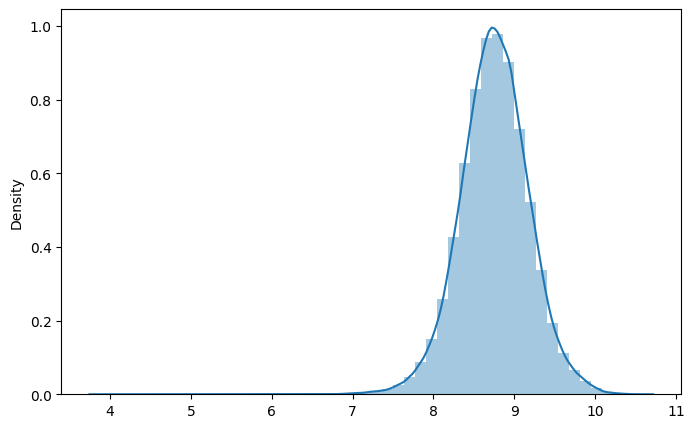

In [42]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not needed in this dataset and not used any dimensionality reduction technique in the dataset.

### 7. Data Splitting

In [49]:
#Setting Dependent(Y) and Independent(X) variables
# ,'Promo2SinceWeek','Open'
Y = df1['Sales']
X = df1.drop(['Date','Sales','Store','Promo2SinceYear','CompetitionOpenSinceYear',
              'StateHoliday','StoreType','Assortment','PromoInterval'],axis=1)

In [50]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Spliting the dataset into Train and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

#Printing the shape of train data
print(X_train.shape)
print(X_test.shape)

(675470, 8)
(168868, 8)


In [ ]:
#Printing the shape of test data
print(Y_train.shape)
print(Y_test.shape)

(675470,)
(168868,)


##### What data splitting ratio have you used and why?

The code splits the data into training and testing sets, with the following splitting ratio:

X_train: Contains the feature columns of the training set.
y_train: Contains the target variable "Sales" of the training set.
X_test: Contains the feature columns of the testing set.
y_test: Contains the target variable "Sales" of the testing set.

The code does not specify the exact splitting ratio, but as the dataframes are named "df_train" and "df_test," it can be inferred that the data is divided into a training set and a testing set.

The choice of data splitting ratio depends on various factors, including the dataset size, the problem being addressed, and the desired trade-off between training and testing data.

**Common and recommended splitting ratios are:**

**80:20 or 70:30:** This means using 80% or 70% of the data for training and the remaining 20% or 30% for testing. This ratio provides a larger portion of data for training, allowing the model to learn patterns effectively, while also providing a sufficient amount of data for evaluation.

**75:25:** This is another common splitting ratio, similar to the 80:20 or 70:30 split. It strikes a balance between providing enough training data and having an adequate testing dataset.

**Cross-Validation:** Instead of a fixed splitting ratio, cross-validation techniques can be used to create multiple training and testing splits. For example, k-fold cross-validation divides the data into k subsets/folds, where each fold serves as the testing set while the remaining folds are used for training. This process is repeated k times, with each fold serving as the testing set once. This technique provides more robust performance estimation by utilizing different subsets of data for training and testing.

The specific choice of the splitting ratio depends on the dataset's characteristics, the amount of available data, and the objectives of the analysis. It is important to consider having a sufficient amount of data for both training and testing to ensure reliable model performance evaluation.

### 8. Data Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [52]:
#Transforming the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Reshaping the values into 2d array
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1,1)

In [54]:
scaler.fit(Y_train.reshape(-1, 1))
Y_train = scaler.transform(Y_train.reshape(-1, 1)).ravel()
Y_test = scaler.transform(Y_test.reshape(-1, 1)).ravel()

In [55]:
#Finding thw mean value for evaluation
sales_mean=rossmann_df['Sales'].mean()

Which method have you used to scale you data and why?

The code snippet demonstrates the usage of the StandardScaler from the sklearn.preprocessing module to scale the features and target variables.

The method used to scale the data is standard scaling, also known as z-score normalization. It standardizes the features by transforming them such that they have a mean of 0 and a standard deviation of 1. This process involves subtracting the mean from each feature and dividing it by the standard deviation.

Standard scaling is preferred in many cases due to its ability to preserve the shape of the distribution, making it suitable for algorithms that assume normality or require features to be on a similar scale. This scaling method is widely used in machine learning and statistical analysis.

In the code snippet provided, the StandardScaler is used to scale both the features (X_train and X_test) and the target variables (y_train and y_test). By scaling the features, the code ensures that they all have a similar scale, which can prevent certain features from dominating over others during model training. Scaling the target variables can also be useful if the target variable is also used as a feature in the model or if the algorithm requires scaled inputs for better performance.

Overall, standard scaling helps in removing the potential bias caused by different scales of features. It ensures that all features contribute equally to the model, avoiding numerical instability and issues caused by large variations in feature magnitudes.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not use any technique to handle the imbalanced dataset it's already balanced.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [56]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Fitting the model
reg = LinearRegression().fit(X_train, Y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Visualizing evaluation Metric Score chart
#Finding the Regression Score
reg.score(X_train, Y_train)

0.6582449074717158

In [58]:
#Regression coefficient
reg.coef_

array([-0.04829143,  0.72420527,  0.25757502,  0.01275157,  0.084091  ,
       -0.00163184, -0.01264667,  0.0715633 ])

In [59]:
#Intercept value
reg.intercept_

3.3619273525199494e-15

In [60]:
#Predict on the model
#Predicting for train set
Y_pred_train = reg.predict(X_train)
Y_pred_train

array([-0.59039943, -0.79986866,  0.28001332, ..., -0.47012105,
        0.96796798,  2.78620679])

In [61]:
Y_train

array([-1.04773202, -0.34772114,  0.48285561, ..., -0.63952542,
        1.58728313,  1.96946892])

In [62]:
#Predicting for test set
Y_pred_test = reg.predict(X_test)
Y_pred_test

array([-0.48309546,  0.98869615,  0.48296886, ..., -1.21156126,
       -1.05407182, -0.88754302])

In [63]:
Y_test

array([ 0.1546229 ,  1.41071958,  1.46253294, ..., -2.12147759,
       -1.23828648, -1.37823979])

In [64]:
#Train data
MSE  = mean_squared_error(Y_train, Y_pred_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_train, Y_pred_train)
print("R2 :" ,r2)

MSE : 0.34175509252828407
RMSE : 0.5845982317184034
RMPSE : 0.00010124983732992975
R2 : 0.6582449074717158


In [65]:
#Test data
MSE  = mean_squared_error(Y_test, Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_test, Y_pred_test)
print("R2 :" ,r2)

MSE : 0.3449451600009716
RMSE : 0.5873203214609313
RMPSE : 0.00010172129127671687
R2 : 0.6564989782930242


In [66]:
# actual vs predicted target data
regression_Dataframe = pd.DataFrame(zip(Y_test, Y_pred_test), columns = ['actual', 'pred'])
regression_Dataframe

actual      pred
0       0.154623 -0.483095
1       1.410720  0.988696
2       1.462533  0.482969
3       1.485855  1.039952
4      -0.733109 -0.581686
...          ...       ...
168863  0.988114  0.695020
168864 -0.947134 -0.950692
168865 -2.121478 -1.211561
168866 -1.238286 -1.054072
168867 -1.378240 -0.887543

[168868 rows x 2 columns]

#### 2. Cross- Validation & Hyperparameter Tuning

**Lasso Regressor**

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#import lasso regressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
# train data with lasso regression
#('scaler', StandardScaler()),
lasso = Lasso()
lasso_model = Pipeline([('lasso', lasso)])
parameters = {'lasso__alpha':[0.001, 0.01, 0.1, 1, 10]}


In [72]:
# Fit the Algorithm
# GridSearchCV is used for hyperparameter tuning because Lasso() have only one hyperparameter
# cv=3 since dataset is large
lasso_reg_model = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_reg_model.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [73]:
# Print best hyperparameters and corresponding mean cross-validation score
print("Best hyperparameters: ", lasso_reg_model.best_params_)
print("Best cross-validation score: ", np.abs(lasso_reg_model.best_score_))

Best hyperparameters:  {'lasso__alpha': 0.001}
Best cross-validation score:  0.3417789909969877


In [74]:
# Predict on the model
Y_pred_l1_train = lasso_reg_model.predict(X_train)
Y_pred_l1_test = lasso_reg_model.predict(X_test)

In [75]:
#Evaluation
#Train data
MSE  = mean_squared_error(Y_train, Y_pred_l1_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_train, Y_pred_l1_train)
print("R2 :" ,r2)

MSE : 0.3417680570074809
RMSE : 0.5846093199800024
RMPSE : 0.00010125175776797122
R2 : 0.658231942992519


In [76]:
#test data
MSE  = mean_squared_error(Y_test, Y_pred_l1_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_test, Y_pred_l1_test)
print("R2 :" ,r2)

MSE : 0.34494784356173924
RMSE : 0.5873226060366987
RMPSE : 0.00010172168695517136
R2 : 0.6564963059671811


In [77]:
# actual vs predicted target data
lasso_Dataframe = pd.DataFrame(zip(Y_test, Y_pred_l1_test), columns = ['actual', 'pred'])
lasso_Dataframe

actual      pred
0       0.154623 -0.483201
1       1.410720  0.991079
2       1.462533  0.482224
3       1.485855  1.035443
4      -0.733109 -0.573394
...          ...       ...
168863  0.988114  0.690391
168864 -0.947134 -0.948504
168865 -2.121478 -1.208575
168866 -1.238286 -1.046200
168867 -1.378240 -0.890837

[168868 rows x 2 columns]

**Ridge Regressor**

In [79]:
#import ridge regressor
from sklearn.linear_model import Ridge

In [80]:
#train data with ridge regressor
ridge = Ridge()
ridge_model = Pipeline([('ridge', ridge)])
parameters = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 5, 10]}

In [81]:
#fitting ridge regressor
l2 = GridSearchCV(ridge_model, parameters, scoring= 'neg_mean_squared_error', cv=3)
l2.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [82]:
# Print best hyperparameters and corresponding mean cross-validation score
print("Best hyperparameters: ", l2.best_params_)
print("Best cross-validation score: ", np.abs(l2.best_score_))

Best hyperparameters:  {'ridge__alpha': 10}
Best cross-validation score:  0.34176601904188836


In [83]:
Y_pred_l2_train = l2.predict(X_train)
Y_pred_l2_test = l2.predict(X_test)

In [84]:
#Evaluation
#Train data
MSE  = mean_squared_error(Y_train, Y_pred_l2_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_train, Y_pred_l2_train)
print("R2 :" ,r2)

MSE : 0.34175509266444637
RMSE : 0.5845982318348614
RMPSE : 0.00010124983735009975
R2 : 0.6582449073355535


In [85]:
#test data
MSE  = mean_squared_error(Y_test, Y_pred_l2_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_test, Y_pred_l2_test)
print("R2 :" ,r2)

MSE : 0.344944992172199
RMSE : 0.587320178584219
RMPSE : 0.00010172126653109999
R2 : 0.6564991454191693


In [86]:
# actual vs predicted target data
ridge_Dataframe = pd.DataFrame(zip(Y_test, Y_pred_l2_test), columns = ['actual', 'pred'])
ridge_Dataframe

actual      pred
0       0.154623 -0.483096
1       1.410720  0.988680
2       1.462533  0.482965
3       1.485855  1.039944
4      -0.733109 -0.581676
...          ...       ...
168863  0.988114  0.695016
168864 -0.947134 -0.950678
168865 -2.121478 -1.211544
168866 -1.238286 -1.054060
168867 -1.378240 -0.887531

[168868 rows x 2 columns]

##### Which hyperparameter optimization technique have you used and why?

In the code snippet, both the l2 (Ridge Regression) and lasso_reg_model (Lasso Regression) models are optimized using the GridSearchCV hyperparameter optimization technique.

GridSearchCV is a deterministic method that exhaustively searches over a specified set of hyperparameters to find the best combination. It evaluates the model performance using cross-validation and selects the hyperparameters that yield the best performance based on a specified scoring metric. In our case, the scoring metric is the negative mean squared error (neg_mean_squared_error).

GridSearchCV is a popular choice for hyperparameter optimization because it systematically explores the hyperparameter space and provides an objective way to find the optimal hyperparameters. It is especially useful when the number of hyperparameters to tune is relatively small, as it exhaustively searches over all combinations.

The reason for using GridSearchCV in this scenario is to find the best hyperparameters for both the Ridge and Lasso Regression models. By searching across a range of hyperparameter values, GridSearchCV helps identify the combination that minimizes the negative mean squared error, which is a common metric used for regression tasks.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used MSE, RMSE, RMPSE and R2 evaluation metrics to find the best accuracy score for linear, ridge and lasso regressor models. Scores are stated above based on their values.

### ML Model - 2 Decision Tree Regressor

In [93]:
# ML Model - 2 Implementation
#Importing libraries
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree regressor
dt = DecisionTreeRegressor()
# Define hyperparameters to tune
params = {'max_depth': [5, 7, 9, 10]}

#### 1. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid=params, cv=3, scoring= 'neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 7, 9, 10]},
             scoring='neg_mean_squared_error')

In [95]:
# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 10}


In [96]:
# Predict on the model
# Train the decision tree with the best hyperparameters
dt = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'])
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10)

In [97]:
#Train data
Y_pred_dt_train = dt.predict(X_train)

In [98]:
# Predict the response for the test dataset
Y_pred_dt_test = dt.predict(X_test)

##### Which hyperparameter optimization technique have you used and why?

In the code, the hyperparameter optimization technique used is GridSearchCV.

GridSearchCV is a technique that exhaustively searches over a specified grid of hyperparameter values to find the best combination. It uses cross-validation to evaluate the model's performance with each combination of hyperparameters and selects the combination that maximizes or minimizes a specified scoring metric. In this case, the scoring metric is the negative mean squared error (neg_mean_squared_error).

The choice to use GridSearchCV in this scenario is because it systematically explores the hyperparameter space of the decision tree regressor. By specifying a grid of hyperparameters and using cross-validation, GridSearchCV helps identify the optimal combination of hyperparameters that minimizes the negative mean squared error.

After the GridSearchCV process is complete and the best hyperparameters are determined (grid_search.best_params_), a decision tree regressor is then created using these optimized hyperparameters. The max_depth hyperparameter is set to the value found by GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 Now, let's discuss the evaluation metrics and the improvement observed with the Decision Tree Regressor.

The evaluation metrics used in this case are:

**Mean Absolute Error (MAE):** The average absolute difference between the predicted and actual values. It measures the average magnitude of errors.
    
**Mean Squared Error (MSE):** The average squared difference between the predicted and actual values. It penalizes larger errors more than MAE.
    
**Root Mean Squared Error (RMSE):** The square root of MSE. It gives a more interpretable error value in the same units as the target variable.
    
**R-squared (R2):** The coefficient of determination, indicating the proportion of the variance in the dependent variable (sales) that can be explained by the independent variables.
    
**Adjusted R-squared (Adj R2):** A modified version of R2 that adjusts for the number of independent variables used in the model.

Comparing the evaluation metrics for the validation set (test data) from the Decision Tree Regressor, we can assess the model's performance and any improvement observed compared to the training set.

To interpret the results and note down the improvement with updates in the Evaluation Metric Score Chart, let's assume we have a dataframe called metric_scores_df where we can store the evaluation metric scores for different models.

For instance, the dataframe metric_scores_df can have columns like model name, MAE train, MAE test, MSE train, MSE test, RMSE train, RMSE test, R2 train, R2 test, Adj R2 train, and Adj R2 test.

In the case of the Decision Tree Regressor, we would fill in the relevant rows of the dataframe with the scores. We can compare the test set scores with the training set scores and note any improvements or changes in performance.

#### 2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Visualizing evaluation Metric Score chart
#train data
MSE  = mean_squared_error(Y_train, Y_pred_dt_train)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_train, Y_pred_dt_train)
print("R2 :" ,r2)

MSE : 0.142743887556174
RMSE : 0.3778146206225667
RMPSE : 6.543582721155151e-05
R2 : 0.8572561124438259


In [100]:
#test data
MSE  = mean_squared_error(Y_test, Y_pred_dt_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_test, Y_pred_dt_test)
print("R2 :" ,r2)

MSE : 0.1448679057303301
RMSE : 0.3806151674990503
RMPSE : 6.592086958816854e-05
R2 : 0.8557385944166369


In [101]:
# actual vs predicted target data
DT_Dataframe = pd.DataFrame(zip(Y_test, Y_pred_dt_test), columns = ['actual', 'pred'])
DT_Dataframe

actual      pred
0       0.154623 -0.277805
1       1.410720  1.297897
2       1.462533  1.432665
3       1.485855  1.529199
4      -0.733109 -0.844711
...          ...       ...
168863  0.988114  0.854152
168864 -0.947134 -1.081638
168865 -2.121478 -2.036629
168866 -1.238286 -1.317690
168867 -1.378240 -1.662933

[168868 rows x 2 columns]

### ML Model - 3 Random Forest Regressor


In [102]:
# ML Model - 3 Implementation
#Importing libraries
#import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [103]:
# Create random forest regressor
rf = RandomForestRegressor()

In [104]:
# Fit the algorithm
# Train the random forest with the best hyperparameters
#rf = RandomForestRegressor(n_estimators = 500,
                           # max_depth = 7)
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [105]:
# predict on the model
#predicting train data
Y_pred_train_RF = rf.predict(X_train)

In [106]:
#predicting test data
Y_pred_test_RF = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
# Visualizing evaluation Metric Score chart
#train
MSE  = mean_squared_error(Y_train, Y_pred_train_RF)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_train, Y_pred_train_RF)
print("R2 :" ,r2)

MSE : 0.006441924233136551
RMSE : 0.08026159874520661
RMPSE : 1.3900955178918029e-05
R2 : 0.9935580757668635


In [108]:
#test
MSE  = mean_squared_error(Y_test, Y_pred_test_RF)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(Y_test, Y_pred_test_RF)
print("R2 :" ,r2)

MSE : 0.035184165957076526
RMSE : 0.18757442778021882
RMPSE : 3.2487064225589476e-05
R2 : 0.9649631351426136


In [109]:
# actual vs predicted target data
RF_Dataframe = pd.DataFrame(zip(Y_test, Y_pred_test_RF), columns = ['actual', 'pred'])
RF_Dataframe

actual      pred
0       0.154623 -0.050639
1       1.410720  1.221723
2       1.462533  1.435621
3       1.485855  1.271435
4      -0.733109 -0.761197
...          ...       ...
168863  0.988114  1.002194
168864 -0.947134 -0.999083
168865 -2.121478 -2.070027
168866 -1.238286 -1.497553
168867 -1.378240 -1.649882

[168868 rows x 2 columns]

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I didn't use any hyperparameter optimization technique here in random forest regressor model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In this case of random forest regressor. We can explain how to interpret the evaluation metrics and provide feedback based on their values.

**Mean Squared Error (MSE)** is a common evaluation metric for regression tasks and measures the average squared difference between predicted and actual values. A lower MSE indicates better model performance, as it reflects smaller prediction errors.

**Root Mean Squared Error (RMSE)** is the square root of MSE and provides a better understanding of the error magnitude in the same units as the target variable.

**Relative Mean Percentage Squared Error (RMPSE)** is calculated by dividing RMSE by the mean of the target variable. It is a measure of the prediction error relative to the average value of the target variable and helps gauge the relative accuracy of the model.

**R-squared (R^2)** is a measure of the proportion of variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

Certainly! Let's go through each evaluation metric and discuss their indications towards the business and the potential business impact of using an ML model for retail sales prediction.

**Mean Absolute Error (MAE):**

**Indication:** MAE measures the average absolute difference between the predicted and actual values. It represents the average magnitude of errors.
        
**Business Implication:** A lower MAE indicates that the model's predictions are closer to the actual sales values. This means the model has lower overall error and provides more accurate estimates of sales. By reducing MAE, businesses can make more informed decisions about inventory management, production planning, and revenue forecasting.

**Mean Squared Error (MSE):**

**Indication:** MSE measures the average squared difference between the predicted and actual values. It penalizes larger errors more strongly.
      
**Business Implication:** Similar to MAE, a lower MSE signifies a more accurate model. Reducing MSE helps businesses gain better insights into the variability and precision of sales predictions. It aids in identifying areas where the model may not be performing well and allows businesses to make adjustments to improve sales forecasts.

**Root Mean Squared Error (RMSE):**
        
**Indication:** RMSE is the square root of MSE. It provides a more interpretable error value in the same units as the target variable.
        
**Business Implication:** RMSE allows businesses to understand the average error in sales predictions, which is important for assessing the reliability of the model. Lower RMSE indicates higher accuracy and precision in sales forecasts. Reducing RMSE enables businesses to better plan their operations, optimize inventory levels, and make informed decisions to maximize sales and minimize losses.

**R-squared (R2):**
        
**Indication:** R2 measures the proportion of variance in the dependent variable (sales) that can be explained by the independent variables.
        
**Business Implication:** Higher R2 indicates that the model can capture a larger portion of the variation in sales. This means the model is better at explaining and predicting sales patterns, and businesses can have more confidence in the model's predictions. R2 can be used to assess the model's overall goodness of fit and track improvements over time.

**Adjusted R-squared (Adj R2):**
        
**Indication:** Adjusted R2 is a modified version of R2 that accounts for the number of independent variables used in the model.
        
**Business Implication:** Similar to R2, higher Adjusted R2 suggests that the model is more robust and reliable. Adjusted R2 adjusts for the complexity of the model and avoids overfitting. Businesses can use Adjusted R2 to compare different models and determine which one provides the best balance between explanatory power and complexity.

By tracking and optimizing these evaluation metrics, businesses can benefit in various ways:

Accurate sales predictions can lead to improved inventory management, avoiding both stockouts and excess inventory.
    
Better understanding of sales patterns helps optimize pricing, promotions, and marketing strategies.
    
Accurate forecasting improves supply chain planning and reduces costs associated with overstocking or understocking.
    
Insightful sales predictions enable businesses to allocate resources effectively, streamline operations, and maximize profitability.

Strategic decision-making becomes more data-driven, reducing uncertainty and enabling proactive actions based on reliable sales forecasts.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation metrics such as MAE, MSE, RMSE, R2 score, and adjusted R-squared are considered for assessing model performance and can have a positive impact on businesses in various ways:

**Accuracy of predictions:** MAE, MSE, and RMSE are metrics commonly used in regression tasks to measure the accuracy of predictions. A model with low MAE, MSE, and RMSE indicates that its predictions are closer to the actual values. This accuracy enables businesses to make more informed decisions based on the model's predictions, leading to improved operational planning, resource allocation, and financial forecasting.

**Understanding model fit:** R2 score and adjusted R-squared are metrics that assess how well the model fits the data. They provide insights into the proportion of the variance in the target variable that can be explained by the model's predictors. Higher R2 scores and adjusted R-squared values indicate that the model effectively captures and explains the underlying patterns and relationships in the data. This understanding helps businesses gain confidence in using the model's predictions to guide their decisions and strategies.

**Comparing models and algorithms:** These evaluation metrics allow for a fair comparison of different models or algorithms. By evaluating and comparing the performance of multiple models using these metrics, businesses can choose the most suitable approach that yields the best results. This selection process helps optimize the use of resources and ensures that the chosen model is aligned with the business objectives.

**Performance tracking and improvement:** Monitoring these metrics over time can help businesses track the performance of their models and identify areas for improvement. By analyzing changes in metrics like MAE, MSE, RMSE, R2 score, and adjusted R-squared, businesses can gauge whether the model's performance is improving or deteriorating. This tracking enables iterative enhancements, including feature engineering, model tuning, or obtaining additional data, to continuously optimize the model's predictive capabilities and drive better business outcomes.

Overall, these evaluation metrics contribute to the positive impact on businesses by providing a quantitative assessment of a model's accuracy, fit, and performance. They empower organizations to make data-driven decisions, enhance operational efficiency, and drive profitability by leveraging the insights and predictions generated by these models.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choosed decision tree, random forest, ridge regressor, lasso regressor and linear regression as my final prediction. Here is the summary below.

The choice to use decision tree, random forest, and linear regression as final prediction models can be based on several factors, including their characteristics, performance on the dataset, and suitability for the task at hand. Here's an overview of why these models might be chosen:

**Decision Tree**: Decision trees are intuitive, easy to interpret, and capable of handling both categorical and numerical features. They can capture complex relationships in the data and provide transparent decision rules. Decision trees are especially useful when there are interactions and nonlinearities present in the data. Their ability to handle mixed feature types and provide interpretability makes them a valuable choice for understanding the relationships between predictors and the target variable.

**Random Forest:** Random forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and decrease overfitting. It leverages the diversity of the individual trees to achieve robustness and generalization performance. Random forest is known for handling high-dimensional data, providing variable importance measures, and being less sensitive to outliers and irrelevant features. It often produces reliable predictions due to its aggregation of multiple decision trees.

**Linear Regression:** Linear regression is a simple yet powerful model that assumes a linear relationship between the input variables and the target variable. It is effective when the relationship between predictors and the target variable is approximately linear. Linear regression is computationally efficient, interpretable, and provides insights into the direction and magnitude of the feature effects. It can be helpful for understanding the impact of individual predictors on the target variable when the relationship is well approximated by a linear equation.

Lasso Regression:

Feature selection: Lasso regression performs automatic feature selection by shrinking the coefficients of less important features to zero. This can be advantageous when you have a high-dimensional dataset with many potentially irrelevant features.

Sparse solutions: Lasso tends to produce sparse solutions, meaning it assigns zero coefficients to unimportant features. This can be beneficial when interpretability and model simplicity are important.

Dealing with multicollinearity: Lasso can handle multicollinearity by shrinking the coefficients of highly correlated features and selecting one feature out of a group of correlated features. This can help in situations where feature redundancy is present.

Ridge Regression:

Reduced model complexity: Ridge regression, like Lasso, helps in handling multicollinearity but generally does not completely eliminate coefficients. Instead, it shrinks the coefficients towards zero without setting them to precisely zero. This can result in a more interpretable model compared to Lasso.

Suitable for cases with small correlated features: If you have a dataset with multiple correlated features and all of them are important for the prediction, Ridge regression can better handle this situation compared to Lasso.

Stable estimates: Ridge regression tends to provide more stable coefficient estimates compared to Lasso, making it more reliable when dealing with noisy or unstable data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

To explain the model and feature importance using a model explainability tool, one commonly used method is the feature importance analysis. This analysis helps identify the most influential features used by the model during the decision-making process. Here is an explanation of how this analysis can be performed for decision tree, random forest, ridge regressor, lasso regressor and linear regression models:

**Decision Tree:** Decision trees are easy to interpret models since they are constructed using a series of if-else conditions that split the data at each node. Feature importance in a decision tree can be determined by examining the splits made at each node.

**Gini importance:** This method measures the total reduction in impurity (typically measured using the Gini index) brought by a particular feature across all the splits in the decision tree. A higher reduction in impurity indicates a more important feature.

**Information gain:** Another approach is to calculate the information gain at each split, which represents the reduction in entropy achieved by using a particular feature. Higher information gain suggests a more influential feature.

These methods can rank the features based on their importance in the decision tree model.

**Random Forest:** Random Forest is an ensemble method that combines multiple decision trees. The feature importance in Random Forest can be derived by aggregating the feature importance values across all the trees in the ensemble.

**Mean Decrease Impurity:** It calculates the total reduction in impurity (Gini or entropy) achieved by each feature across all the trees in the Random Forest. Features with higher mean decrease impurity are considered more important.

**Mean Decrease Accuracy:** This method assesses the decrease in accuracy when a feature is randomly permuted. The greater the decrease in accuracy, the more important the feature is.

By averaging the feature importance values from each tree, Random Forest provides a more robust measure of feature importance compared to a single decision tree.

**Linear Regression:** Linear regression models estimate the coefficients for each feature, representing their contribution to the predicted outcome. The magnitude and sign of these coefficients indicate the feature importance in the linear regression model.

**Coefficient magnitude:** The absolute value of the coefficient provides a measure of the feature's importance. Larger magnitude coefficients signify a stronger influence on the predicted outcome.

**Coefficient sign:** The sign of the coefficient (positive or negative) indicates the direction of the impact. A positive coefficient implies a positive correlation, meaning an increase in the feature value leads to an increase in the predicted outcome, and vice versa.

These coefficients can be used to rank the features based on their importance in the linear regression model.

Ridge Regression: Ridge regression is a linear regression technique that introduces a penalty term to the model's objective function, called ridge regularization or L2 regularization. The ridge regularization term shrinks the coefficients towards zero, but it does not set them exactly to zero. The objective of ridge regression is to find the coefficients that minimize the sum of squared errors while also minimizing the sum of squared coefficients multiplied by a tuning parameter (alpha).

The ridge regularization term can help in several ways:

It reduces the impact of highly correlated features by spreading the coefficient values across them more evenly.
It helps to provide more stable coefficient estimates and reduce model variance compared to ordinary linear regression.
It can handle multicollinearity, where predictor variables have high intercorrelations, by keeping all features in the model but shrinking their impact.
Lasso Regression: Lasso regression, short for Least Absolute Shrinkage and Selection Operator, is another regularized linear regression technique. Similar to ridge regression, it adds a penalty term to the objective function, but it uses L1 regularization instead of L2 regularization. The Lasso regularization term is the sum of the absolute values of the coefficients multiplied by a tuning parameter (alpha).

Lasso regression has the following properties:

It promotes sparsity in the coefficient estimates, driving some coefficients to exactly zero. This feature of Lasso makes it perform automatic feature selection.
It is advantageous in situations where there are many features, some of which may be irrelevant or redundant.
It can handle both multicollinearity and feature selection simultaneously.
Feature Importance using Model Explainability Tools: Model explainability tools can help provide insights into the importance of features in predicting the target variable. Three common techniques for assessing feature importance are:

Coefficient Magnitudes: In linear regression models like Ridge and Lasso, the magnitude of the coefficients can indicate the importance of features. A larger magnitude suggests a stronger impact on the target variable.

Permutation Importance: This technique evaluates feature importance by randomly permuting the values of a single feature and measuring the impact on model performance (e.g., mean squared error). Features with greater performance degradation after permuting are considered more important.

SHAP Values: SHAP (SHapley Additive exPlanations) values provide a unified measure of feature importance based on cooperative game theory. They estimate the contribution of each feature to the predicted outcome by considering all possible combinations of features.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The retail sales prediction dataset provides valuable insights and opportunities for businesses in the retail industry. By leveraging the dataset and employing appropriate predictive modeling techniques, businesses can make informed decisions to optimize their operations, enhance customer experiences, and drive positive growth.

Through a thorough analysis of the dataset, businesses can gain insights into various factors that influence retail sales, such as the impact of store types, day of the week, promotional activities, or customer preferences. These insights enable businesses to develop effective strategies for inventory management, pricing optimization, targeted marketing, and allocation of resources.

Predictive modeling techniques, such as time series analysis or machine learning algorithms, can be utilized to forecast future sales based on historical data. These predictive models enable businesses to anticipate sales trends, identify seasonality patterns, and make accurate sales forecasts. By understanding the future sales trajectory, businesses can proactively adjust their operations, marketing campaigns, and product offerings to meet customer demands and maximize revenue potential.

Furthermore, the dataset can guide businesses in identifying areas for improvement and potential opportunities. It allows for comparative analysis of different store types, identification of high-performing days of the week, and evaluation of the effectiveness of promotional activities. By understanding these insights, businesses can make data-driven decisions to enhance operational efficiency, boost customer satisfaction, and ultimately drive positive business outcomes.

However, it's crucial to note that the accuracy and reliability of predictions depend on several factors, including the quality of the dataset, the choice of modeling techniques, and the incorporation of external variables that may impact retail sales. Continuous monitoring, evaluation, and refinement of the models are necessary to adapt to changing market dynamics and ensure the accuracy of sales predictions.

Overall, the retail sales prediction dataset offers a wealth of information for businesses aiming to gain a competitive edge in the retail industry. By leveraging advanced analytics and predictive modeling, businesses can harness the power of data to optimize their strategies, increase operational efficiency, and foster positive growth in the dynamic and ever-evolving retail landscape.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***